In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('unicorns.csv')
data = data.rename(columns={'Last Valuation (Billion $)': 'Valuation'})
data.set_index('Company')

Updated at  \
Company                              
Esusu       10/31/2022, 2:37:05 AM   
Fever Labs  10/31/2022, 2:37:05 AM   
Minio       10/31/2022, 2:37:04 AM   
Darwinbox   10/31/2022, 2:37:04 AM   
Pentera     10/31/2022, 2:37:04 AM   
...                            ...   
Fanatics    10/31/2022, 2:32:42 AM   
SpaceX      10/31/2022, 2:32:38 AM   
Vice Media  10/31/2022, 2:33:10 AM   
Klarna      10/31/2022, 2:33:05 AM   
Veepee      10/31/2022, 2:35:27 AM   

                                               Crunchbase Url  Valuation  \
Company                                                                    
Esusu                https://www.cbinsights.com/company/esusu       1.00   
Fever Labs      https://www.cbinsights.com/company/fever-labs       1.00   
Minio                https://www.cbinsights.com/company/minio       1.00   
Darwinbox        https://www.cbinsights.com/company/darwinbox       1.00   
Pentera             https://www.cbinsights.com/company/pcysys       1.00   
...                                                       ...        ...   
Fanatics          https://www.cbinsights.com/company/fanatics      27.00   
SpaceX      https://www.cbinsights.com/company/space-explo...     127.00   
Vice Media      https://www.cbinsights.com/company/vice-media       5.70   
Klarna              https://www.cbinsights.com/company/klarna       6.70   
Veepee        https://www.cbinsights.com/company/vente-privee       1.38   

           Date Joined  Year Joined                   City        Country  \
Company                                                                     
Esusu        1/27/2022         2022               New York  United States   
Fever Labs   1/26/2022         2022               New York  United States   
Minio        1/26/2022         2022              Palo Alto  United States   
Darwinbox    1/25/2022         2022              Hyderabad          India   
Pentera      1/11/2022         2022            Petah Tikva         Israel   
...                ...          ...                    ...            ...   
Fanatics      6/6/2012         2012           Jacksonville  United States   
SpaceX       12/1/2012         2012              Hawthorne  United States   
Vice Media    4/2/2011         2011               Brooklyn  United States   
Klarna      12/12/2011         2011              Stockholm         Sweden   
Veepee        7/2/2007         2007  La Plaine Saint-Denis         France   

                                   Industry  \
Company                                       
Esusu                               Fintech   
Fever Labs     Internet software & services   
Minio           Data management & analytics   
Darwinbox      Internet software & services   
Pentera                      Cybersecurity    
...                                     ...   
Fanatics    E-commerce & direct-to-consumer   
SpaceX                                Other   
Vice Media     Internet software & services   
Klarna                              Fintech   
Veepee      E-commerce & direct-to-consumer   

                                                    Investors  Company Website  
Company                                                                         
Esusu       ["Next Play Ventures","Zeal Capital Partners",...              NaN  
Fever Labs                        ["Accel","14W","GS Growth"]              NaN  
Minio       ["General Catalyst","Nexus Venture Partners","...              NaN  
Darwinbox   ["Lightspeed India Partners","Sequoia Capital ...              NaN  
Pentera      ["AWZ Ventures","Blackstone","Insight Partners"]              NaN  
...                                                       ...              ...  
Fanatics    ["SoftBank Group","Andreessen Horowitz","Temas...              NaN  
SpaceX      ["Founders Fund","Draper Fisher Jurvetson","Ro...              NaN  
Vice Media  ["Technology Crossover Ventures","A&E Televisi...              NaN  
Klarna      ["Institutional Venture

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Updated at       1199 non-null   object 
 1   Company          1199 non-null   object 
 2   Crunchbase Url   1199 non-null   object 
 3   Valuation        1199 non-null   float64
 4   Date Joined      1199 non-null   object 
 5   Year Joined      1199 non-null   int64  
 6   City             1181 non-null   object 
 7   Country          1199 non-null   object 
 8   Industry         1199 non-null   object 
 9   Investors        1199 non-null   object 
 10  Company Website  0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 103.2+ KB


# 1.1 determine how many industries are represented in the data and how much each

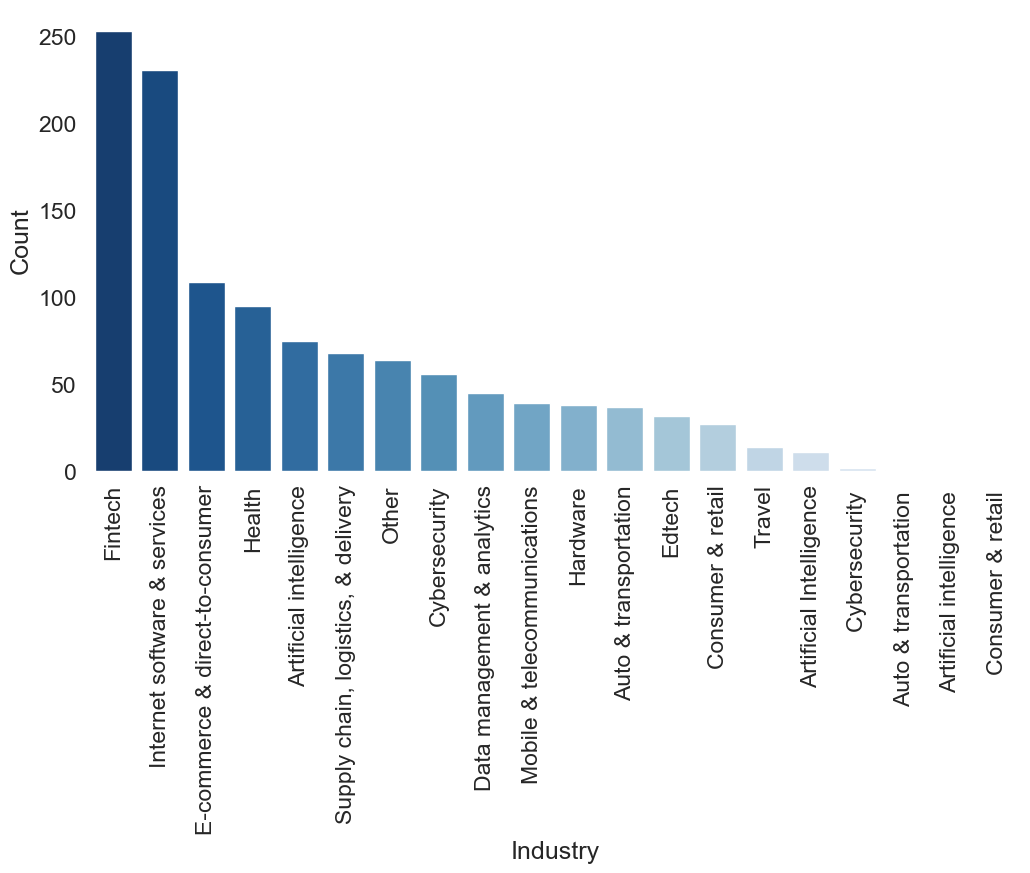

In [4]:
# data['Industry'].value_counts().plot(kind='bar')
import matplotlib.pyplot as plt
import seaborn as sns

# Get the value counts for each industry
industry_counts = data['Industry'].value_counts()

# Set the figure size and font scale
sns.set(font_scale=1.5, rc={'figure.figsize':(12,6)})

# Create the bar plot
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='Blues_r')

# Add axis labels and a title
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title="Number of Observations by Industry"

# Rotate the x-axis labels to improve readability
plt.xticks(rotation=90)

# Remove the bounding box around the plot
plt.box(False)

# Show the plot
plt.show()


# determine which nation has the most fintech-based startups.

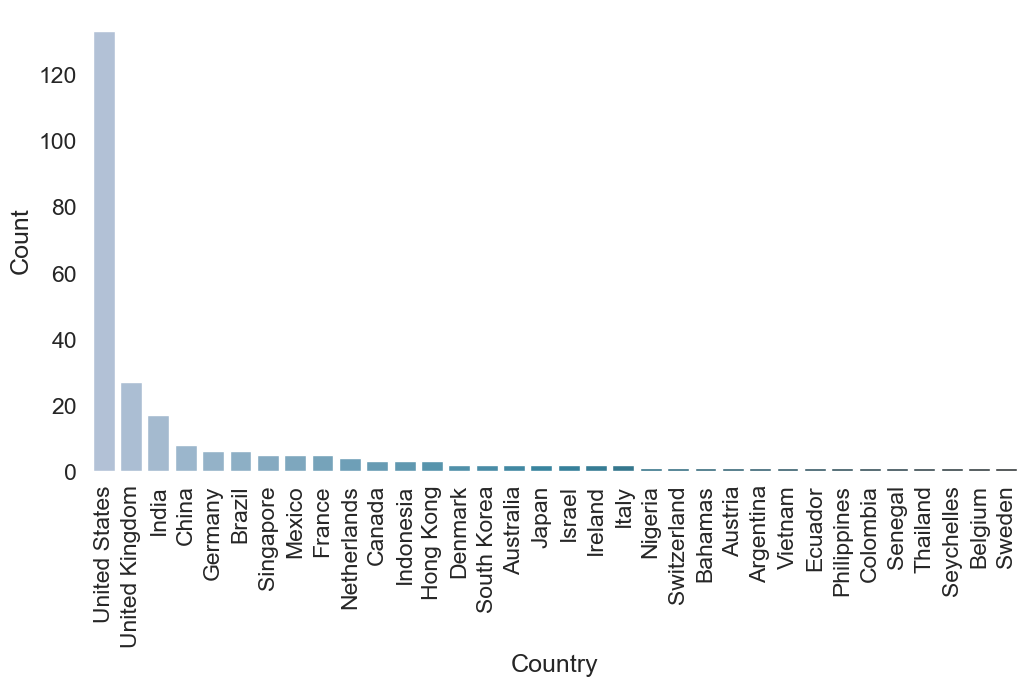

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data to only include rows where the Industry column is 'Fintech'
fintech_df = data.loc[data.Industry == 'Fintech']

# Get the value counts for each country
country_counts = fintech_df['Country'].value_counts()

# Set the figure size and font scale
sns.set(font_scale=1.5, rc={'figure.figsize':(12,6)})

# Create the bar plot
sns.barplot(x=country_counts.index, y=country_counts.values, palette='PuBuGn_d')

# Add axis labels and a title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title='Number of Fintech Observations by Country'

# Rotate the x-axis labels to improve readability
plt.xticks(rotation=90)

# Remove the bounding box around the plot
plt.box(False)

# Show the plot
plt.show()



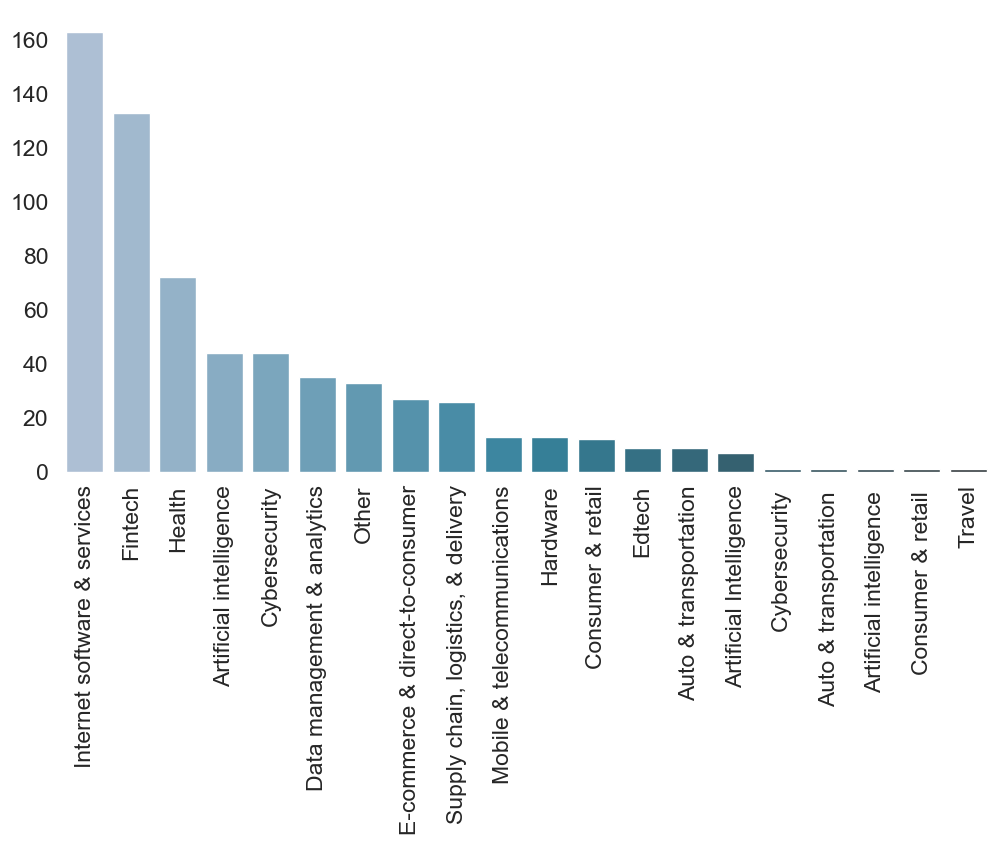

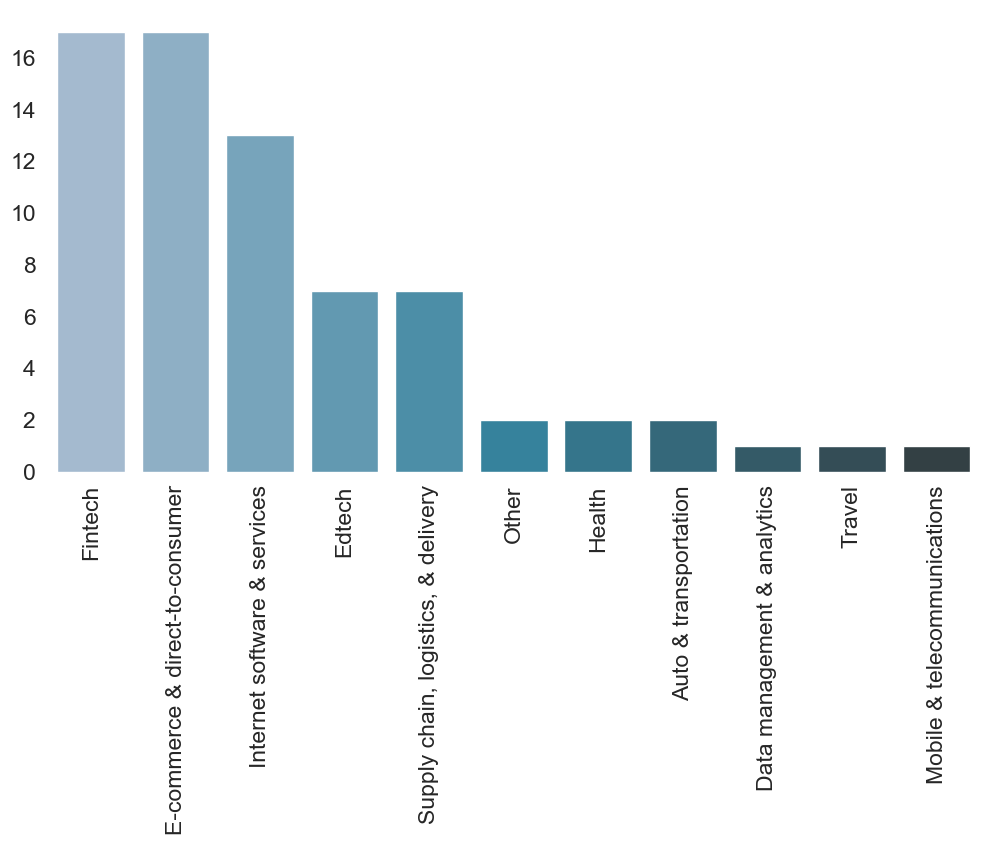

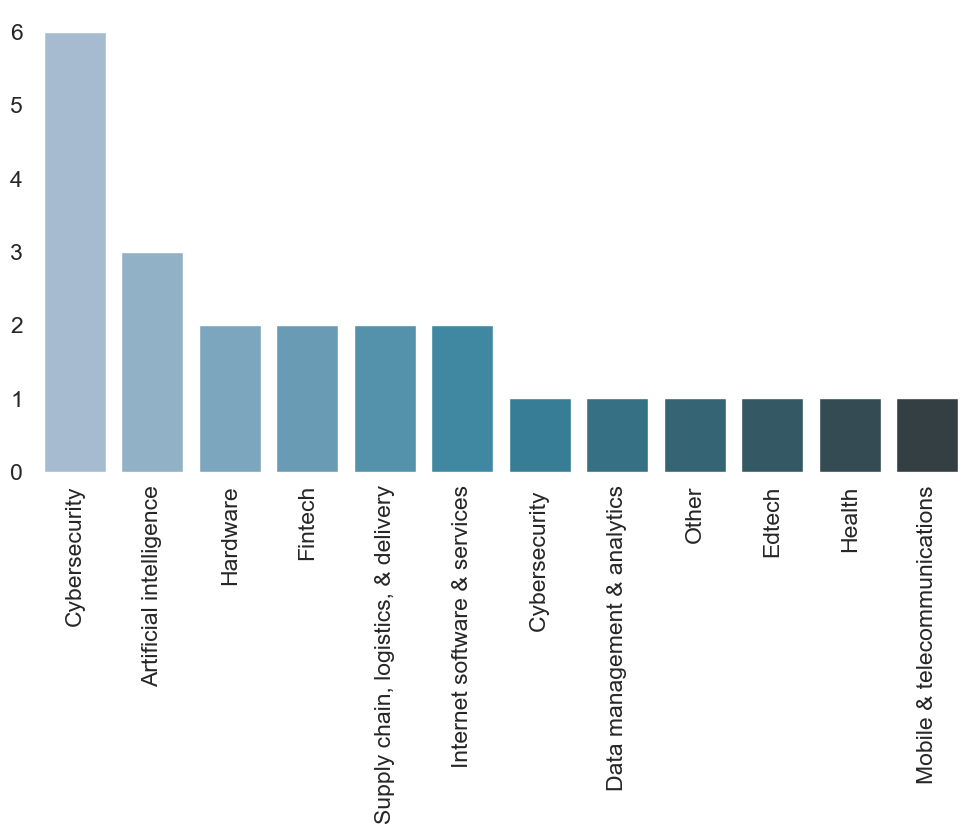

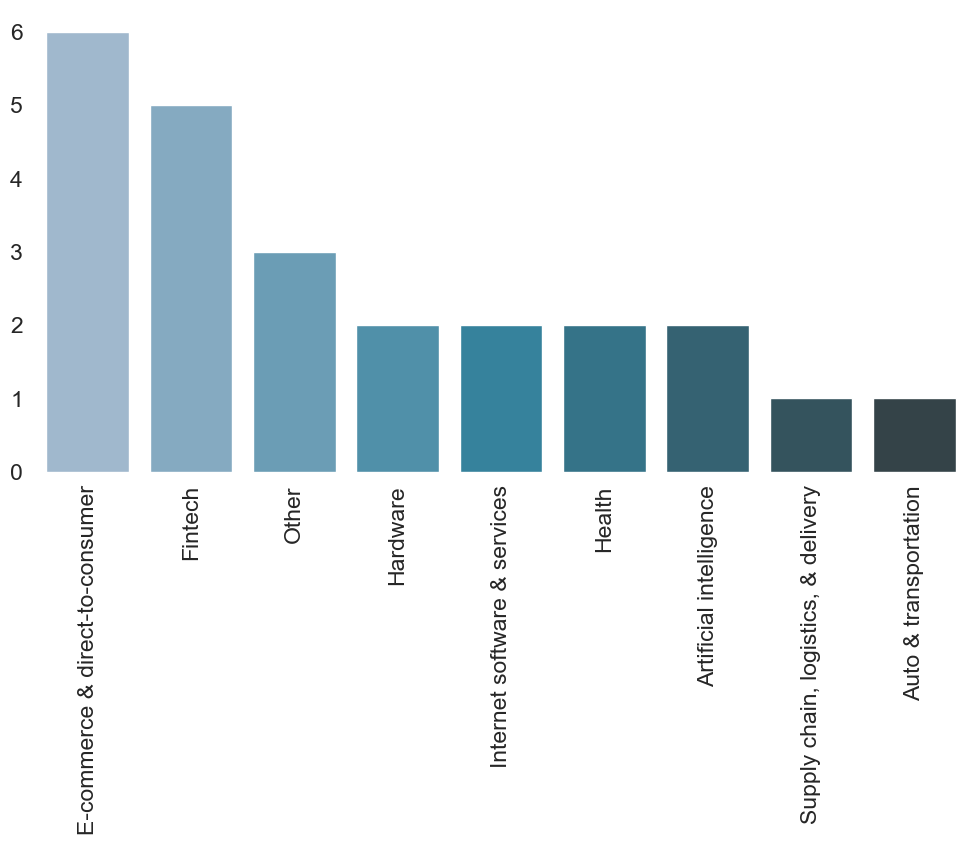

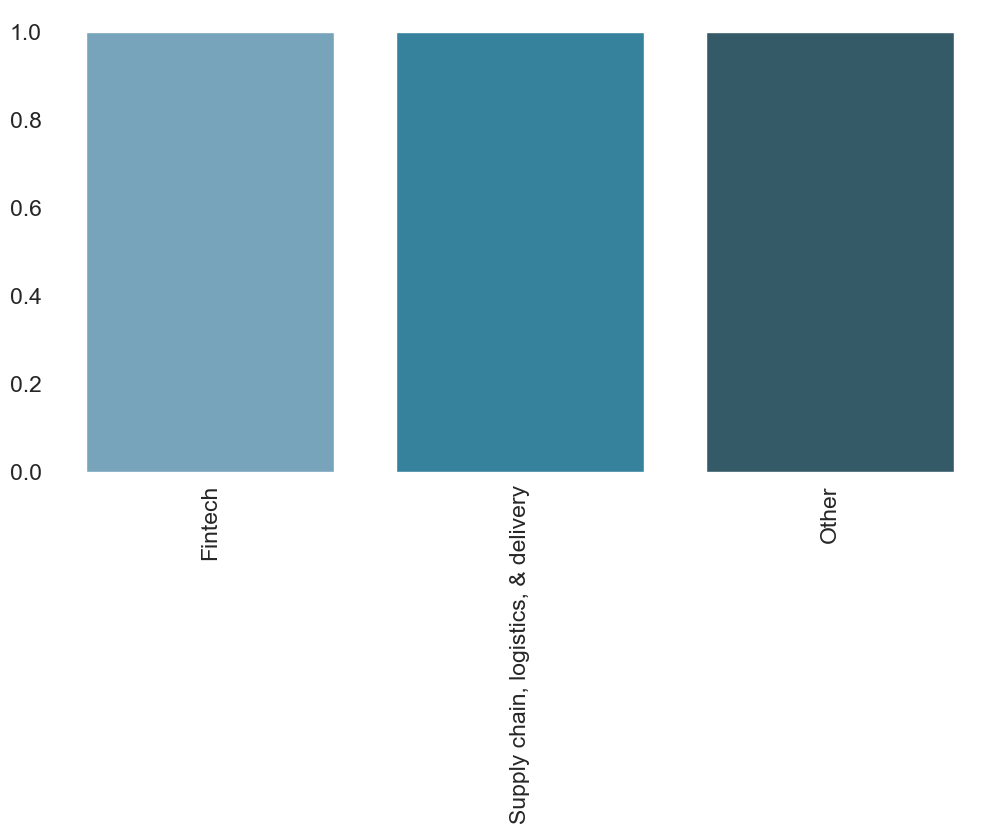

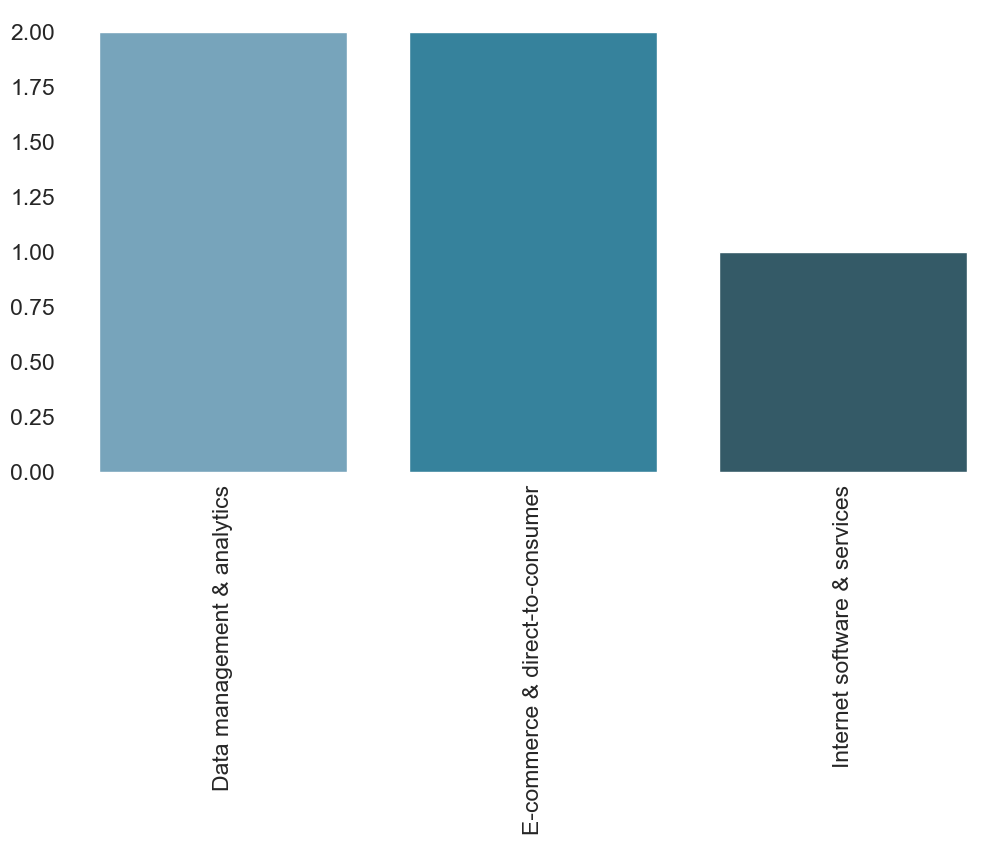

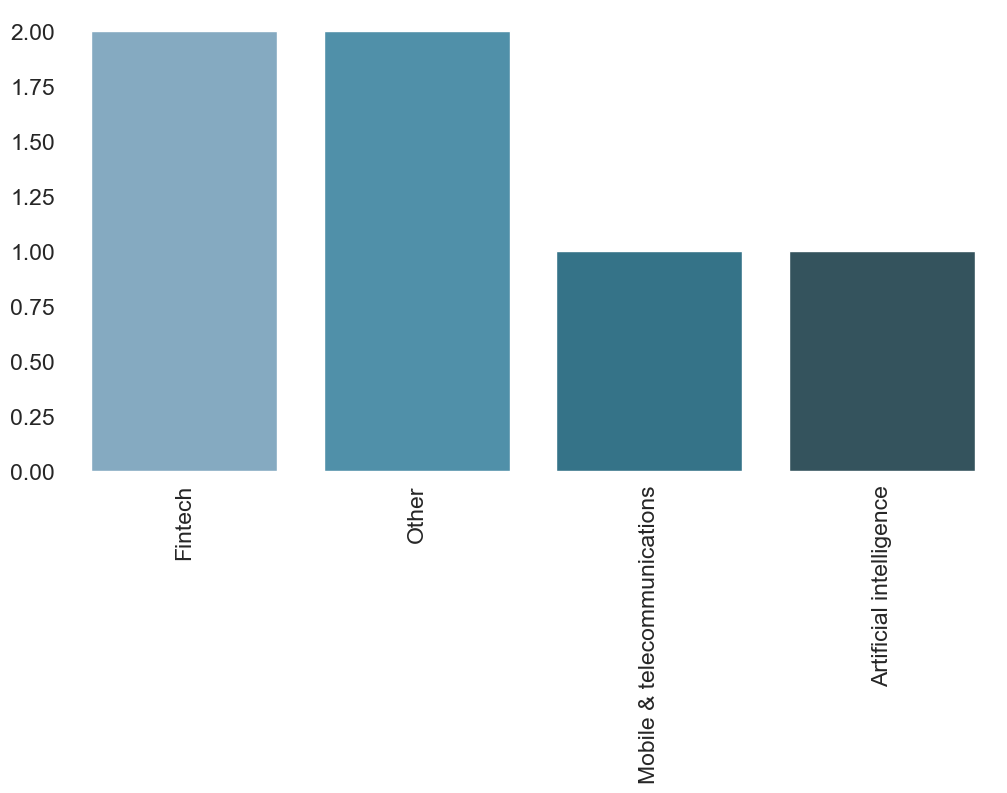

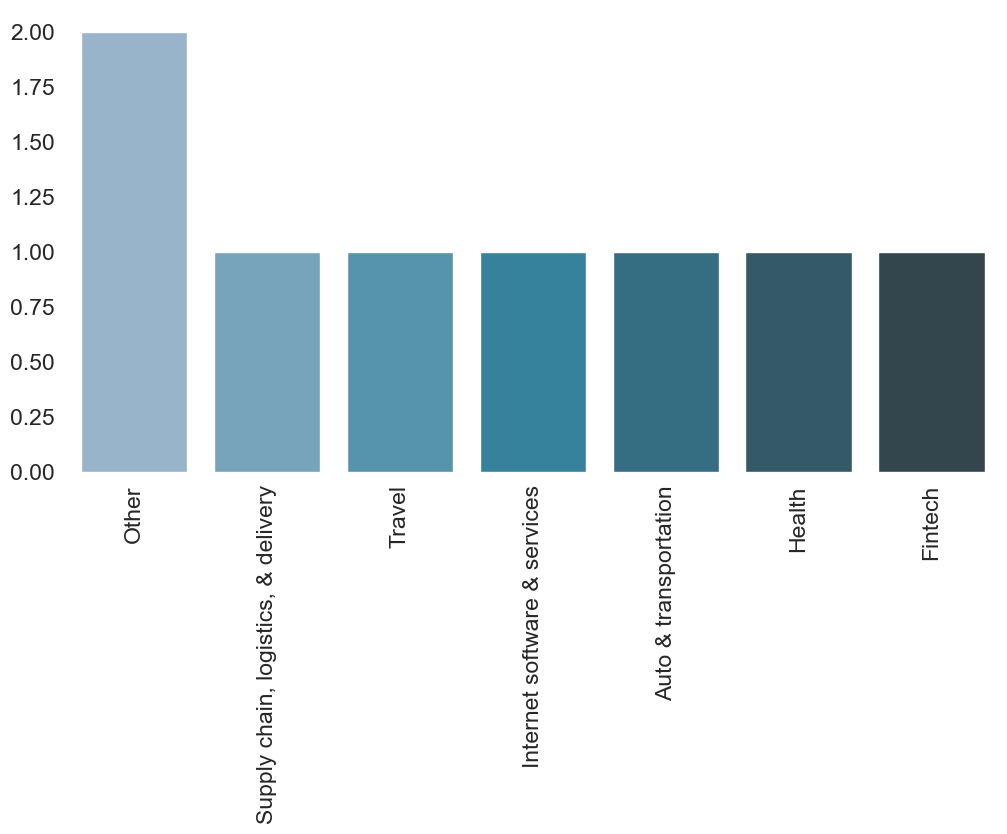

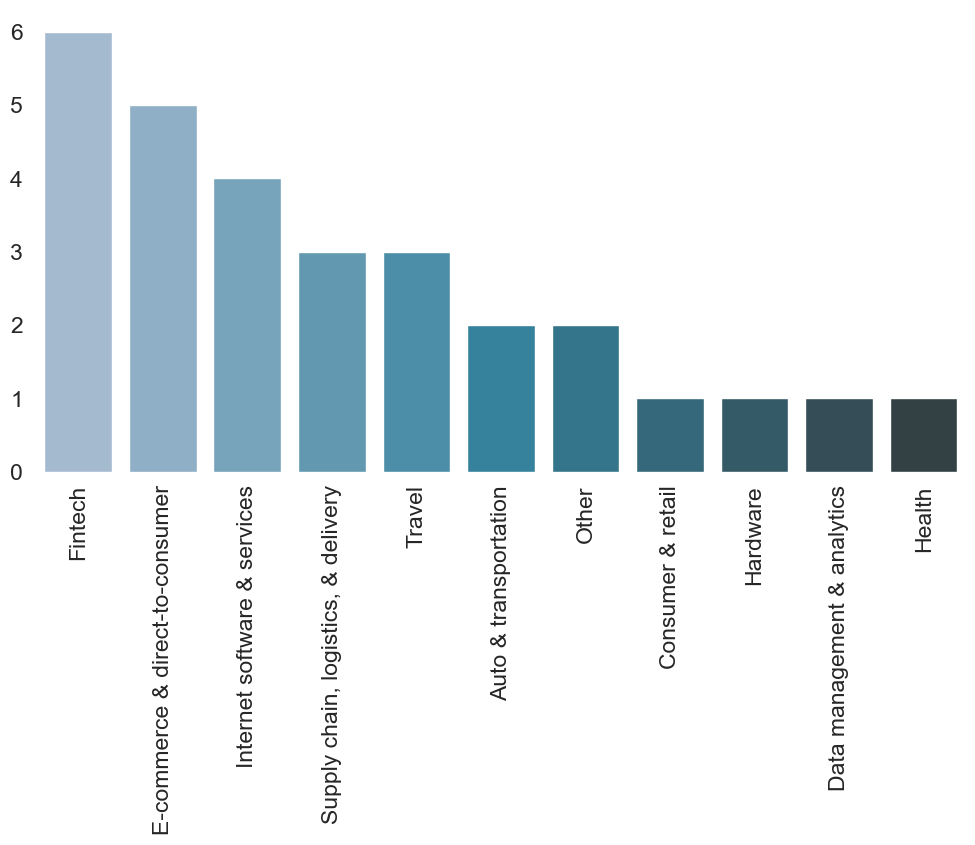

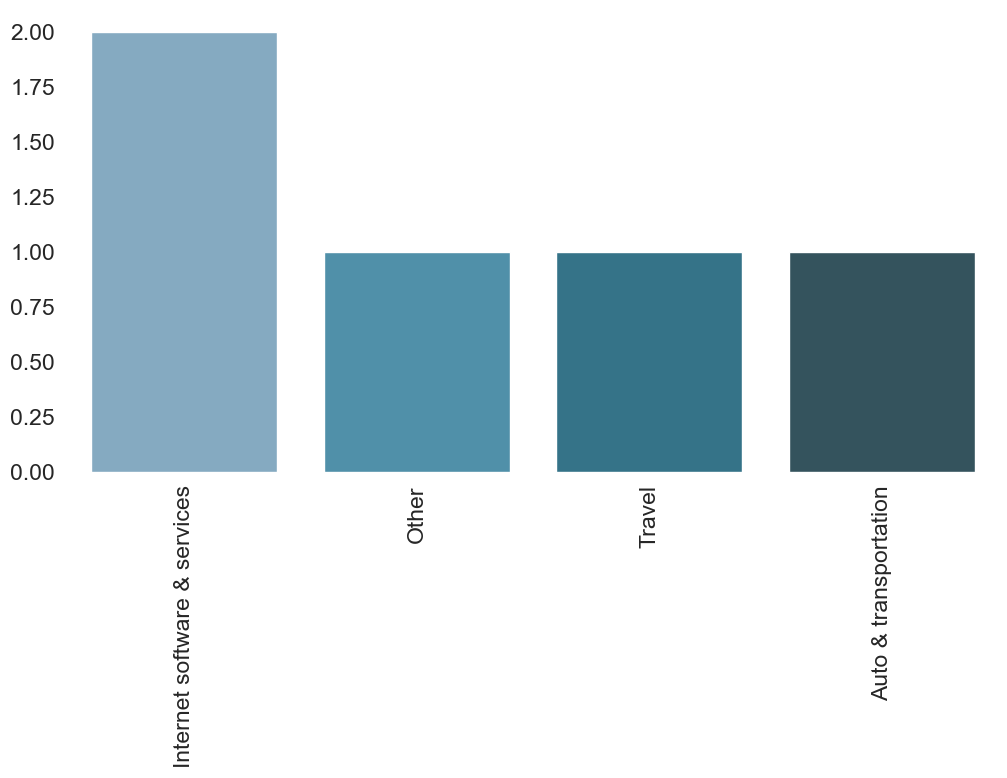

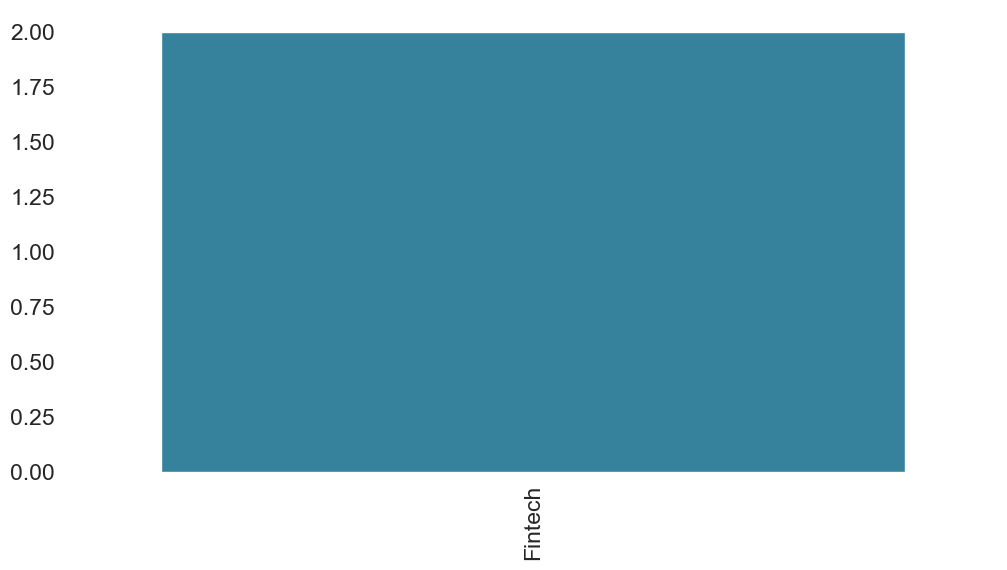

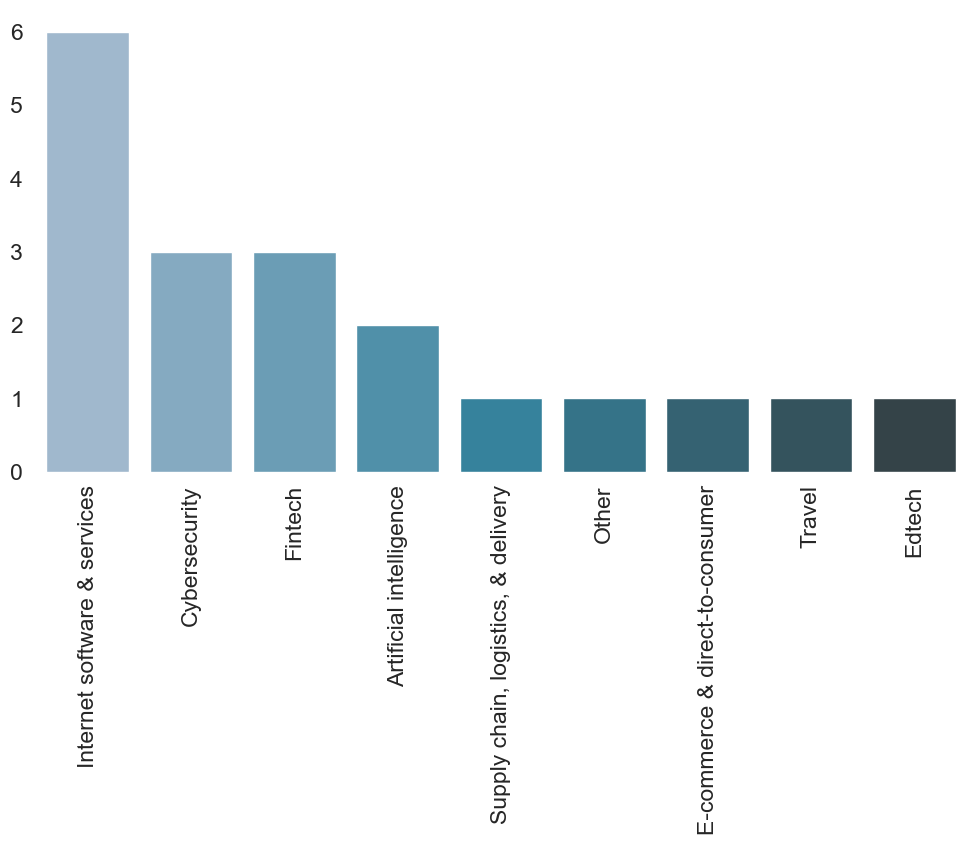

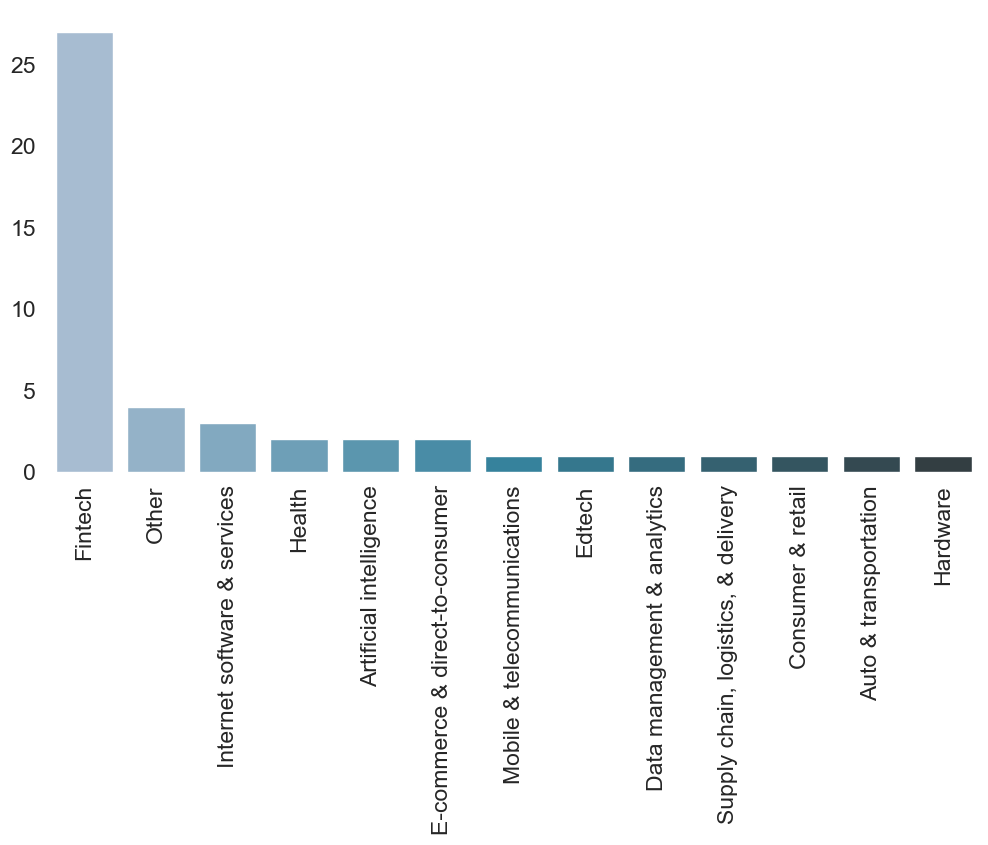

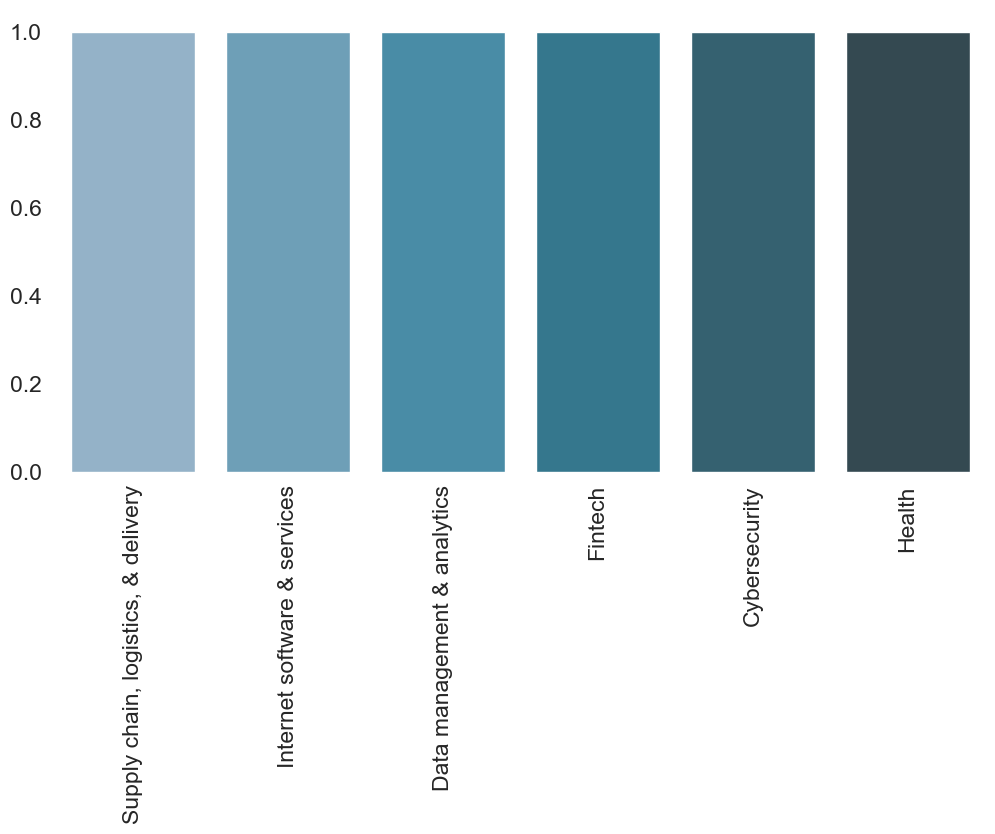

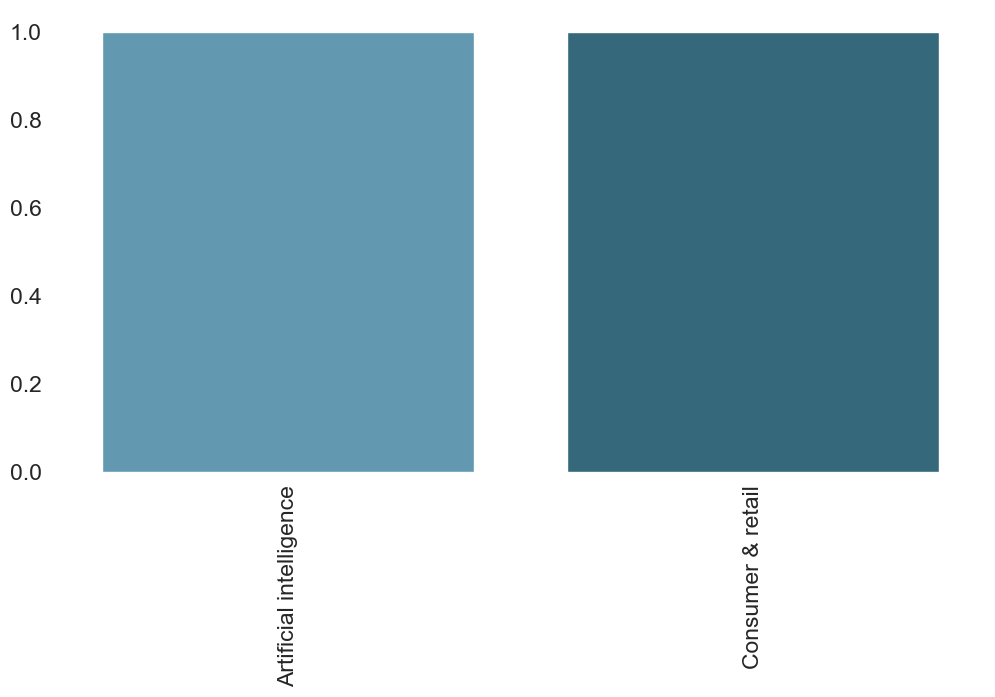

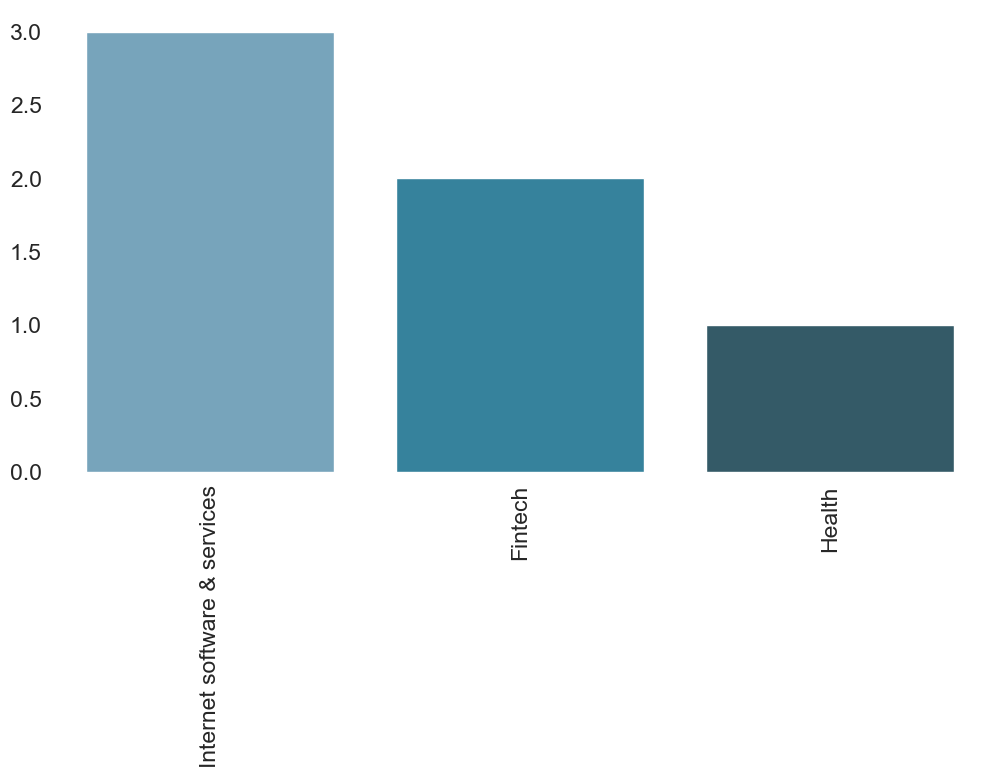

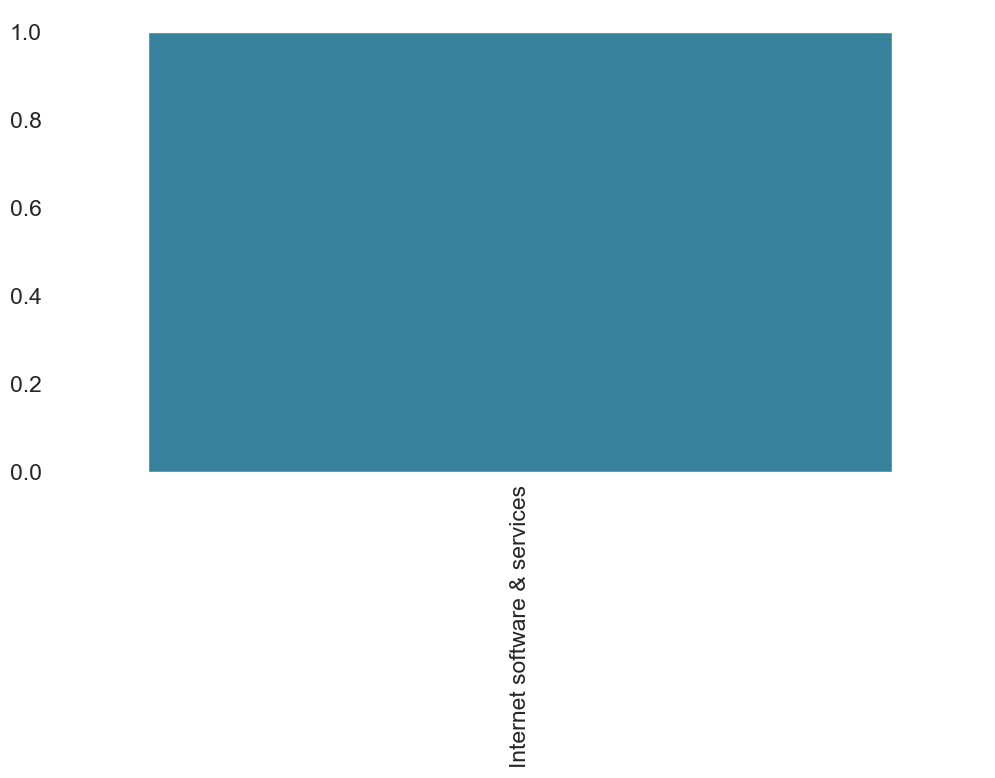

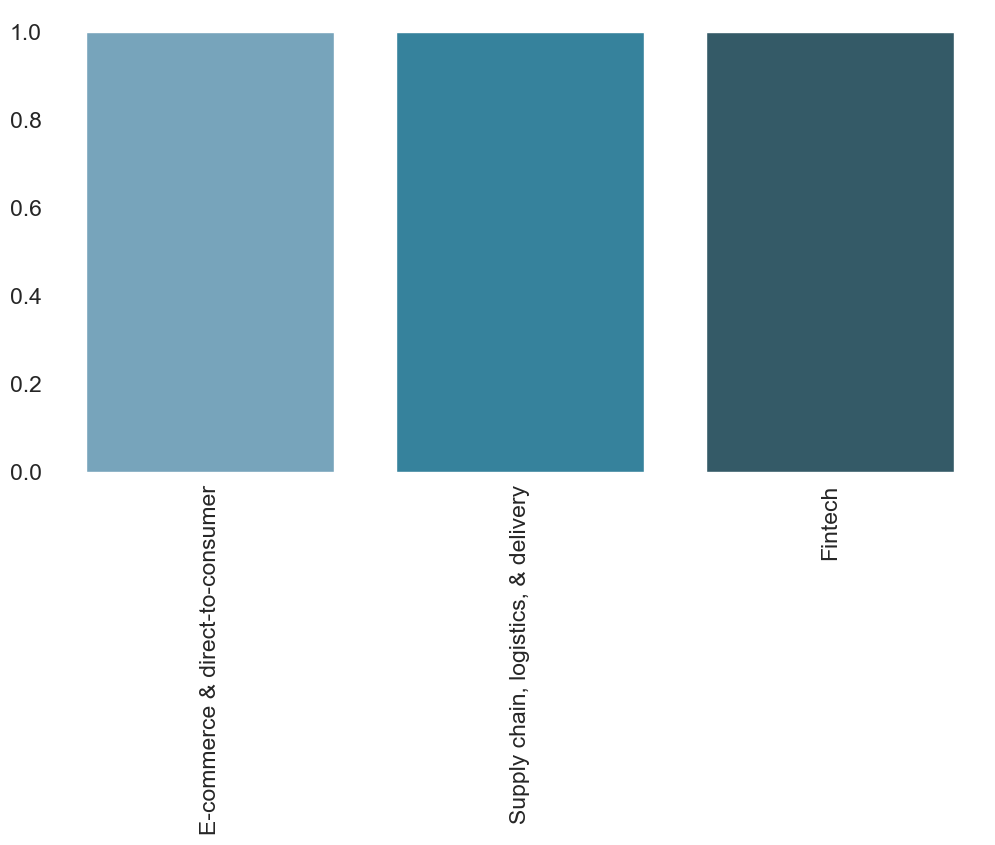

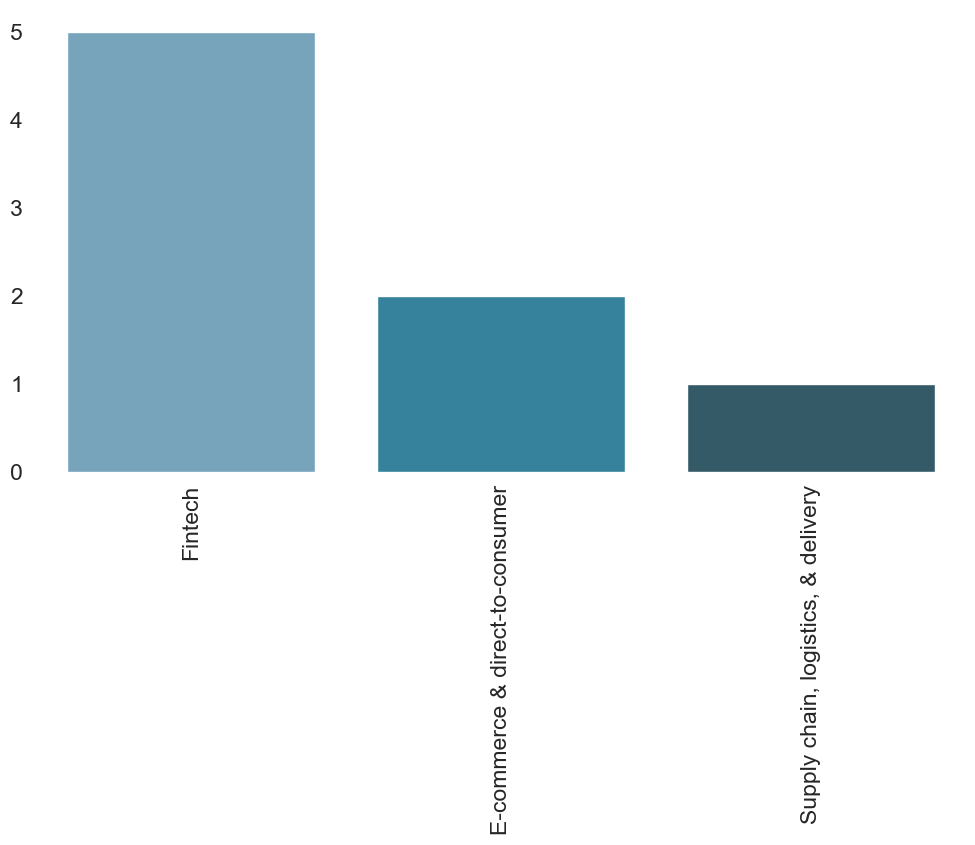

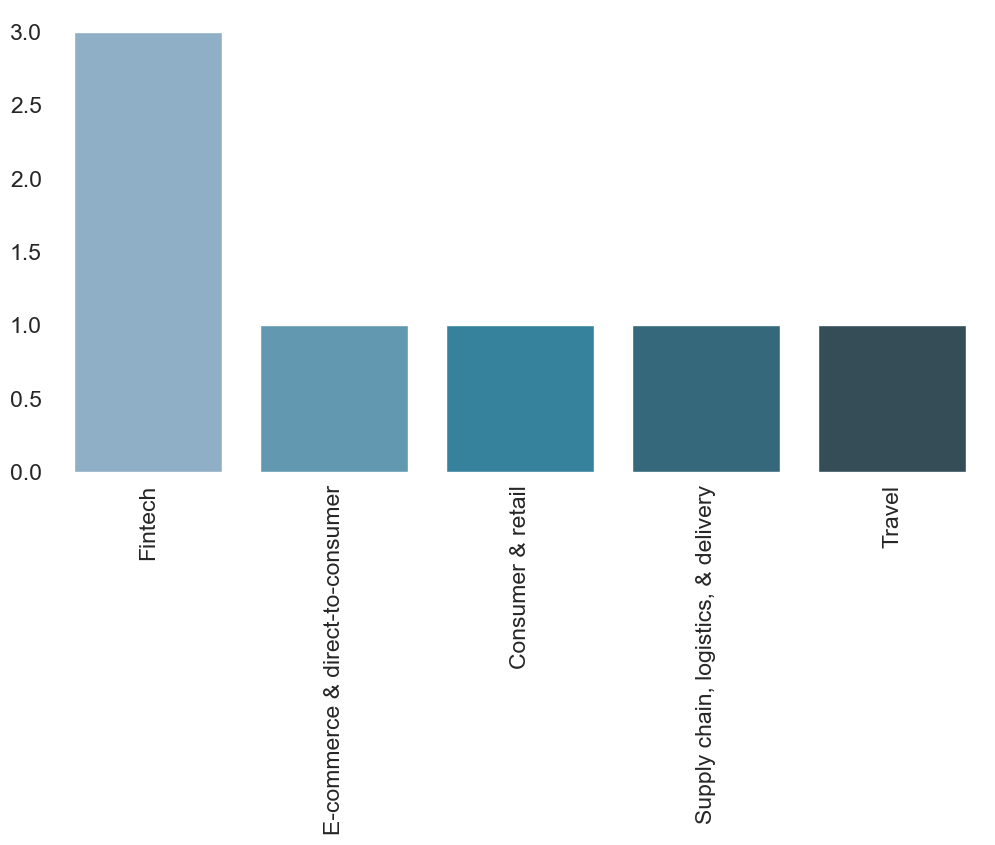

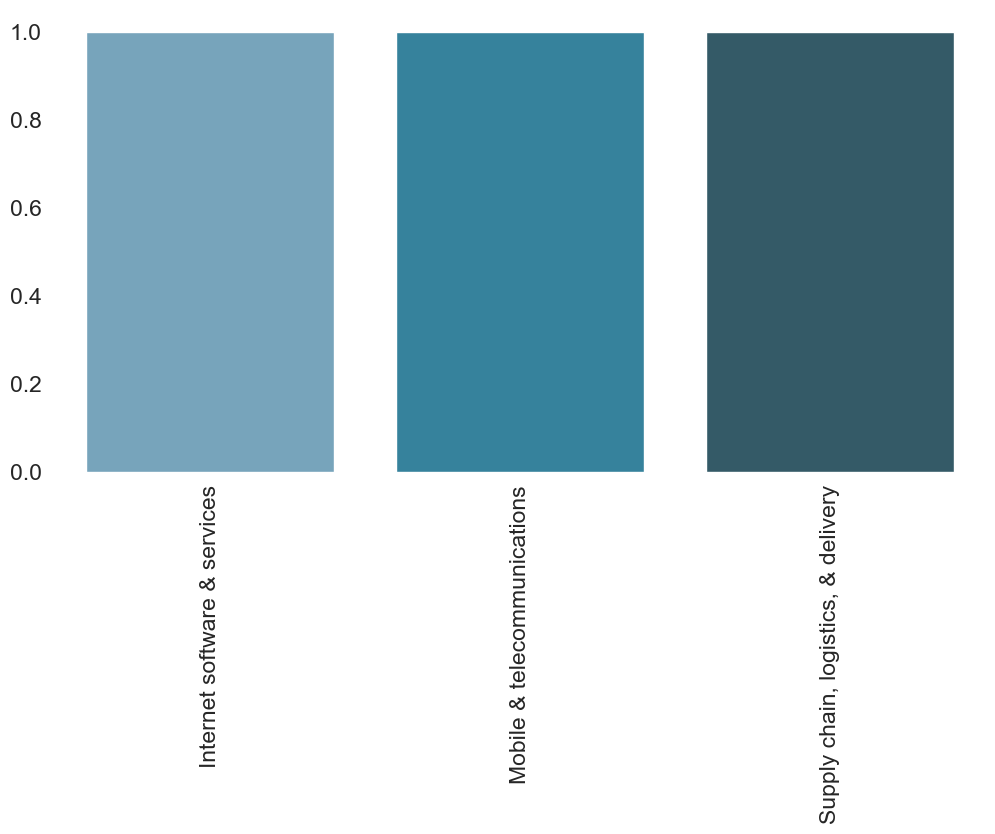

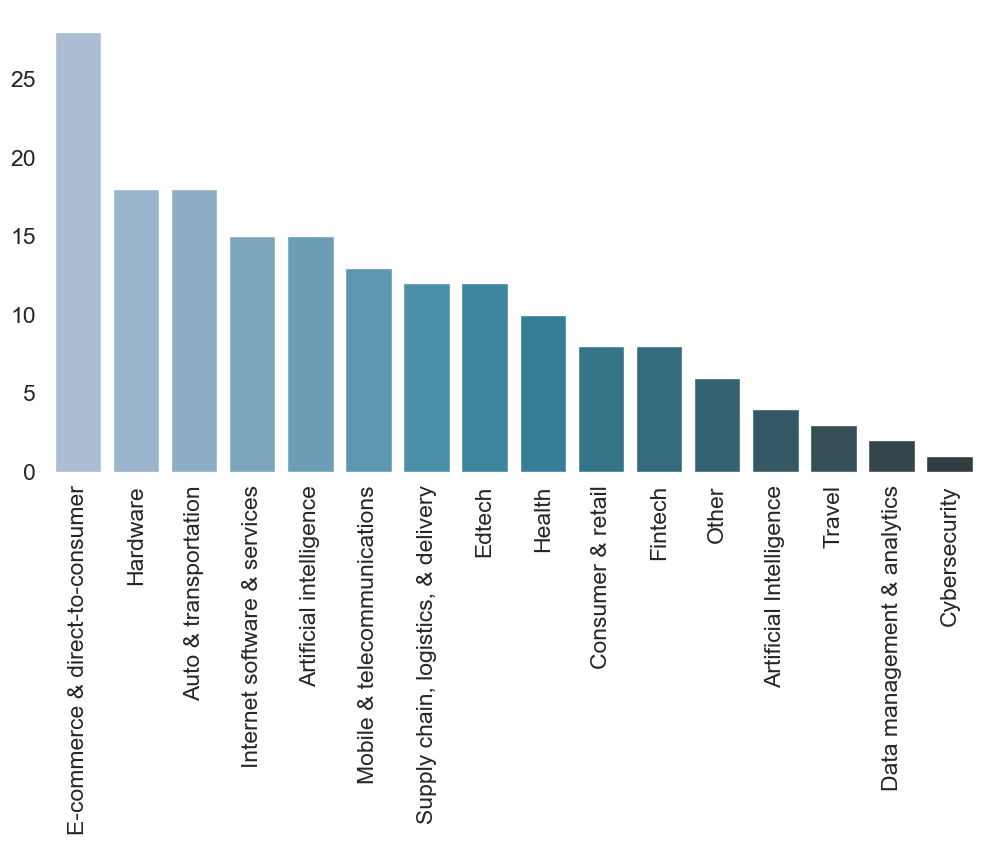

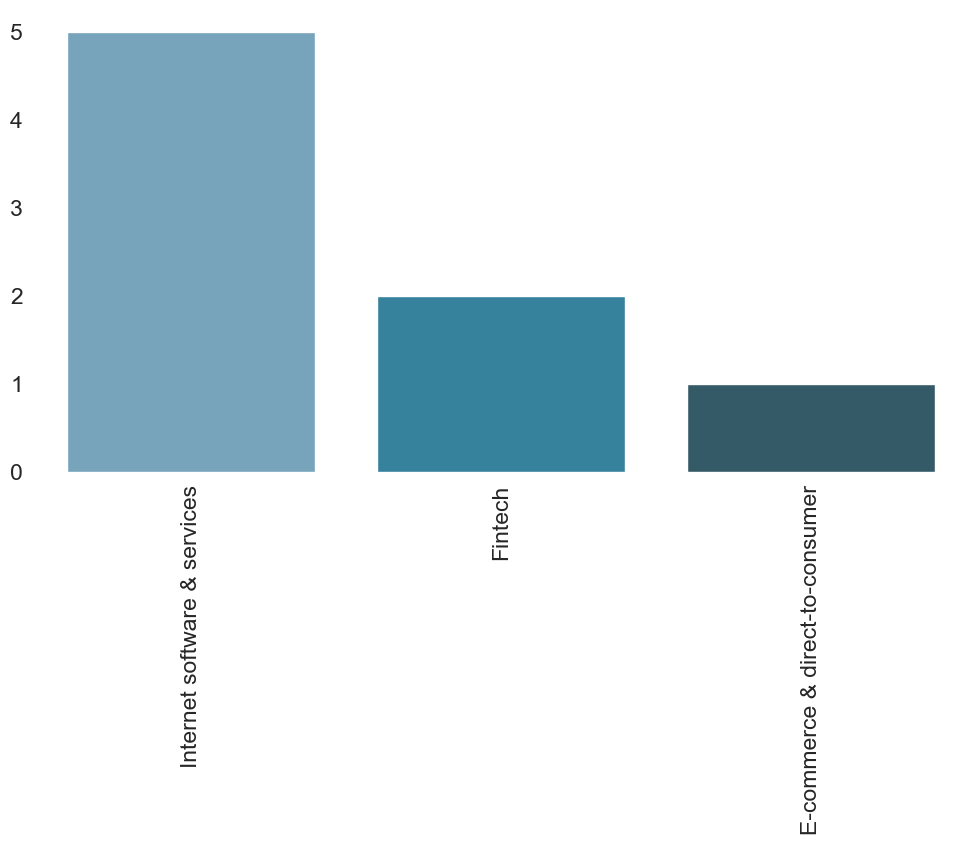

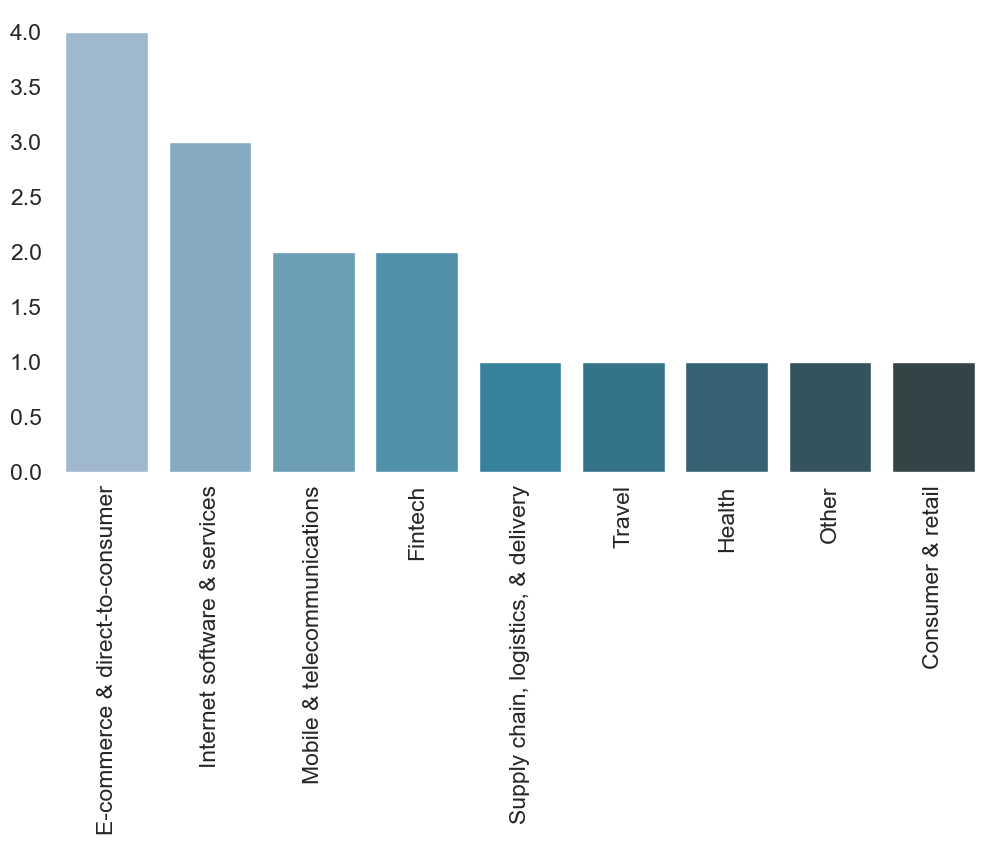

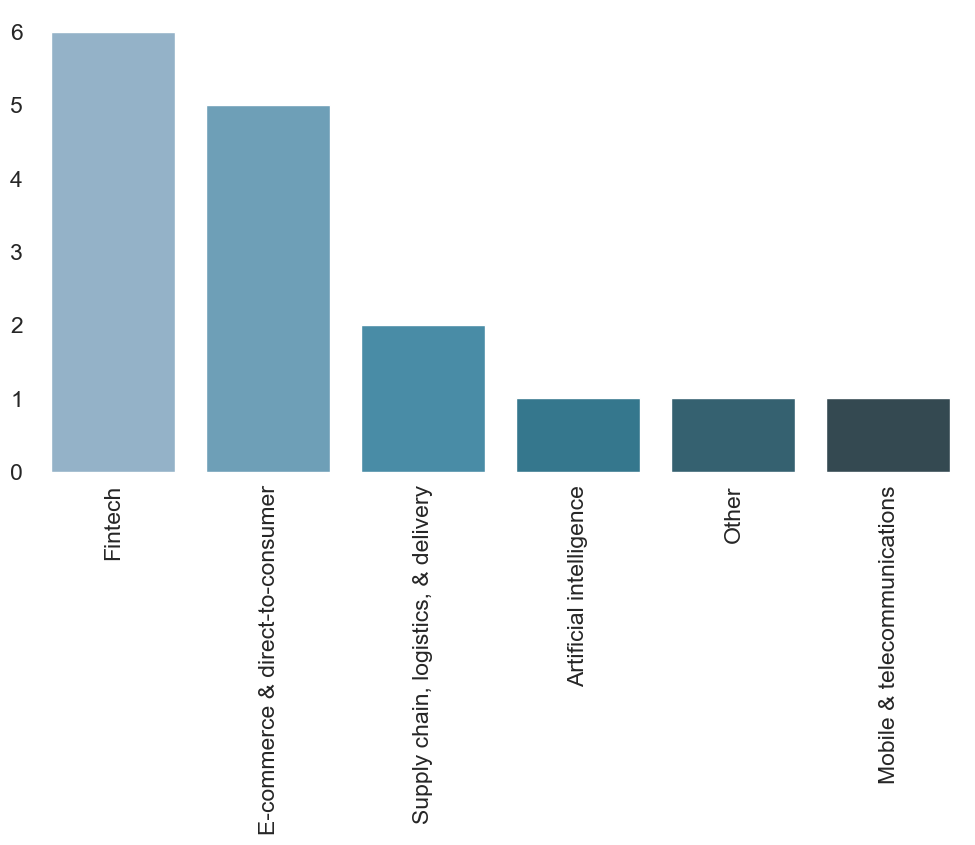

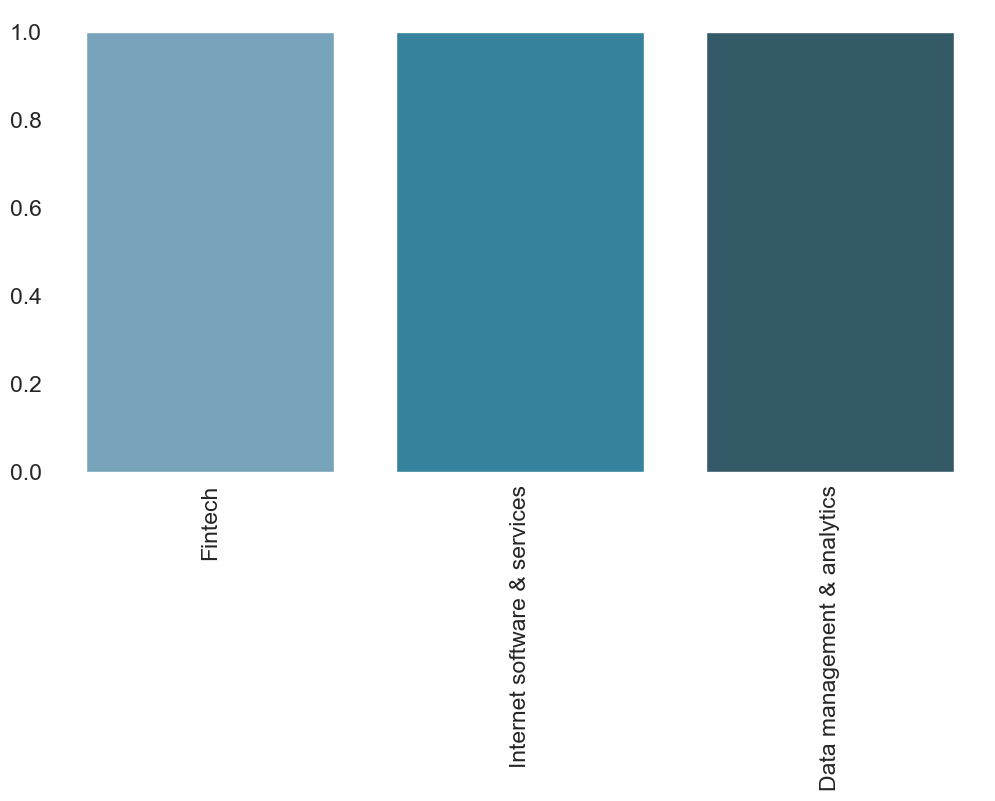

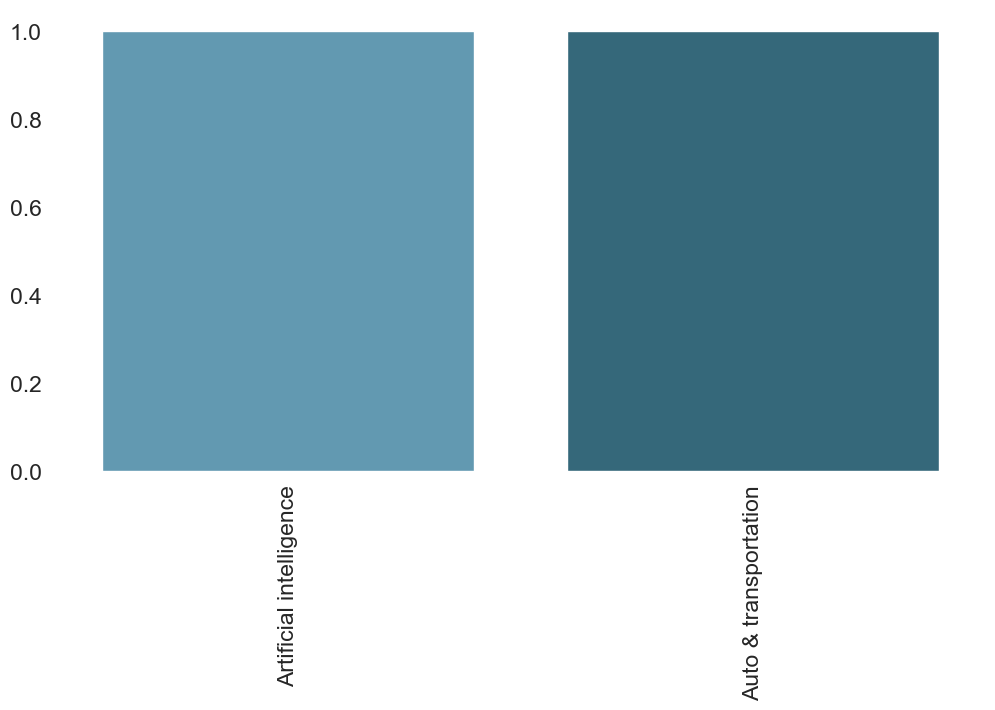

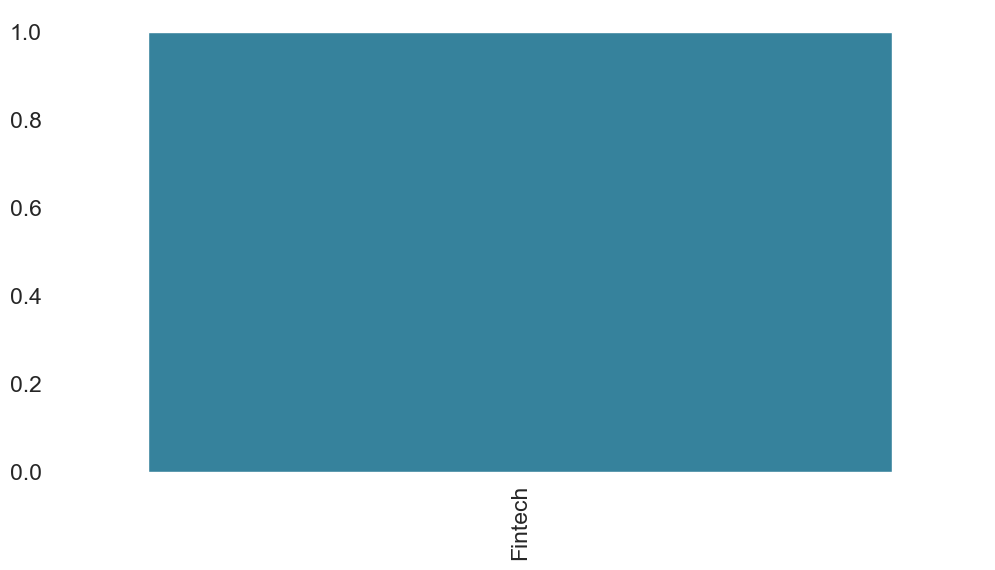

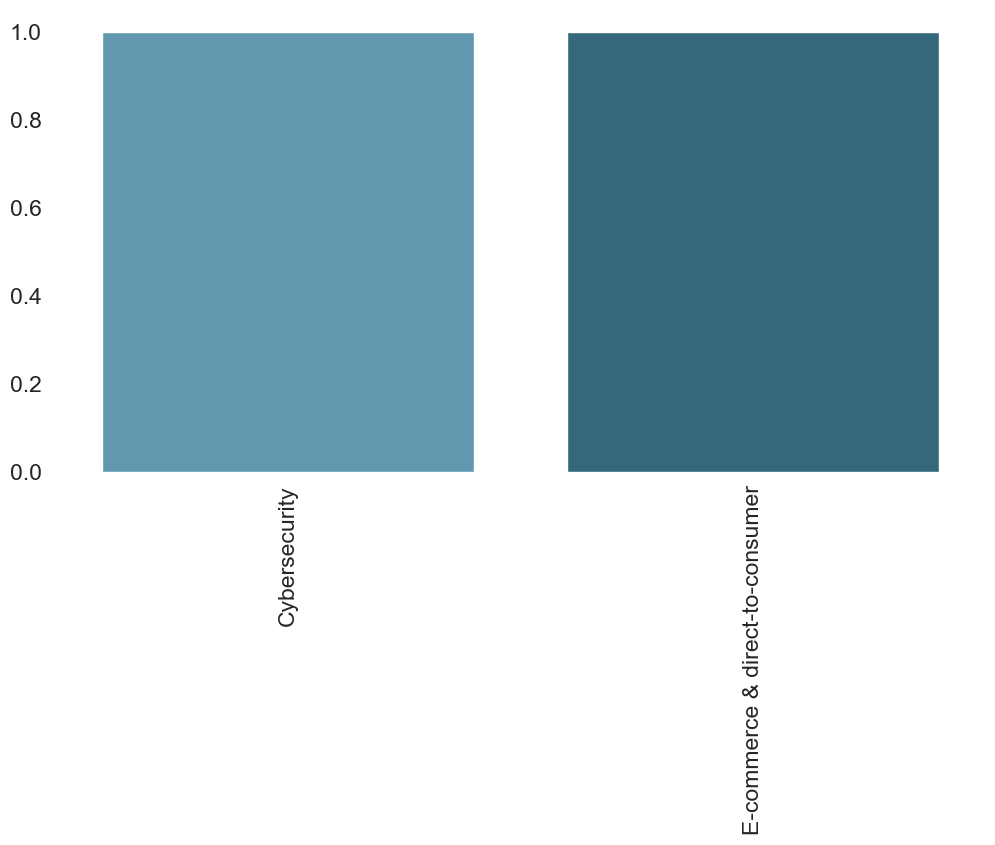

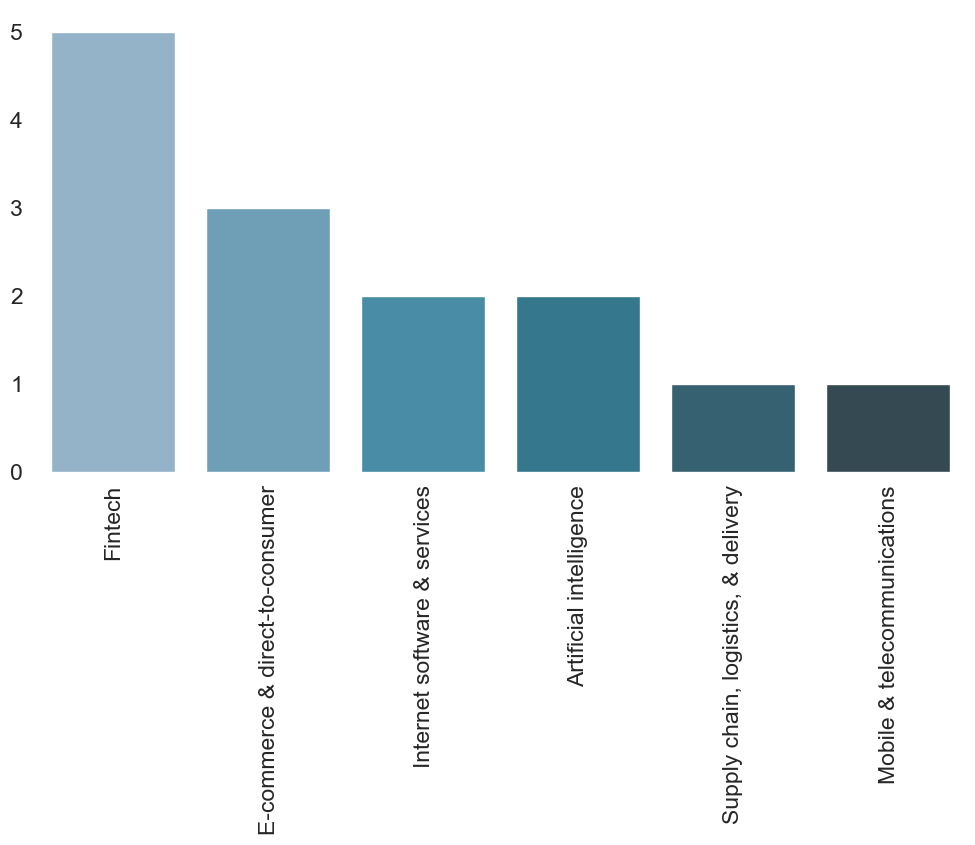

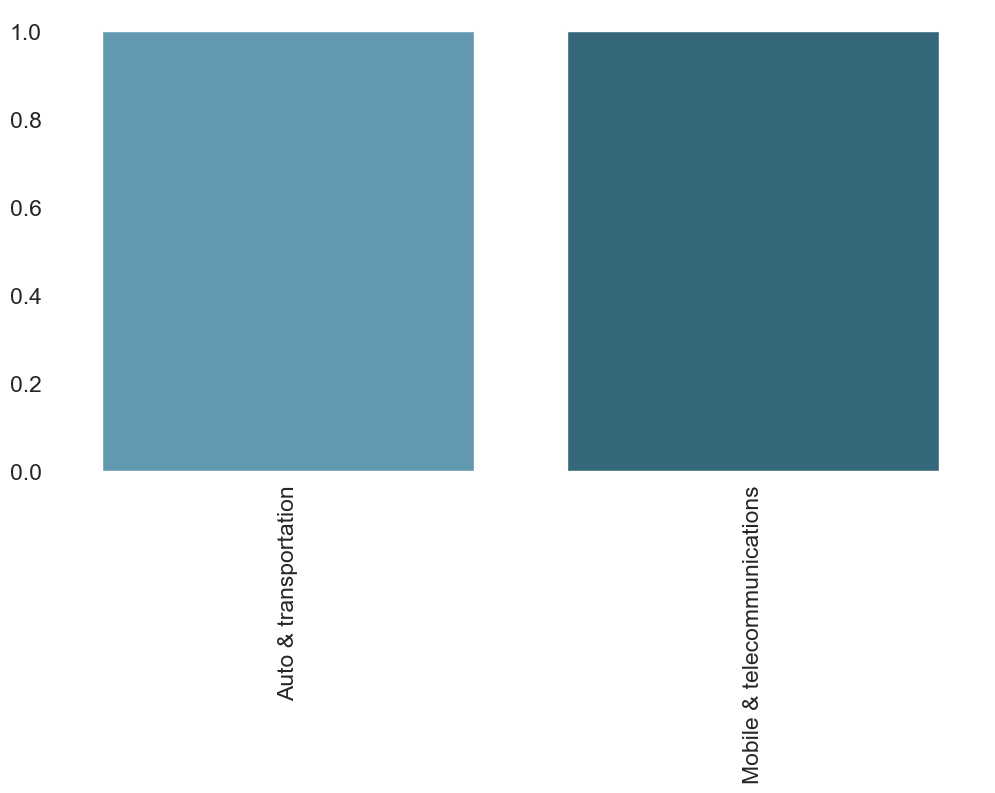

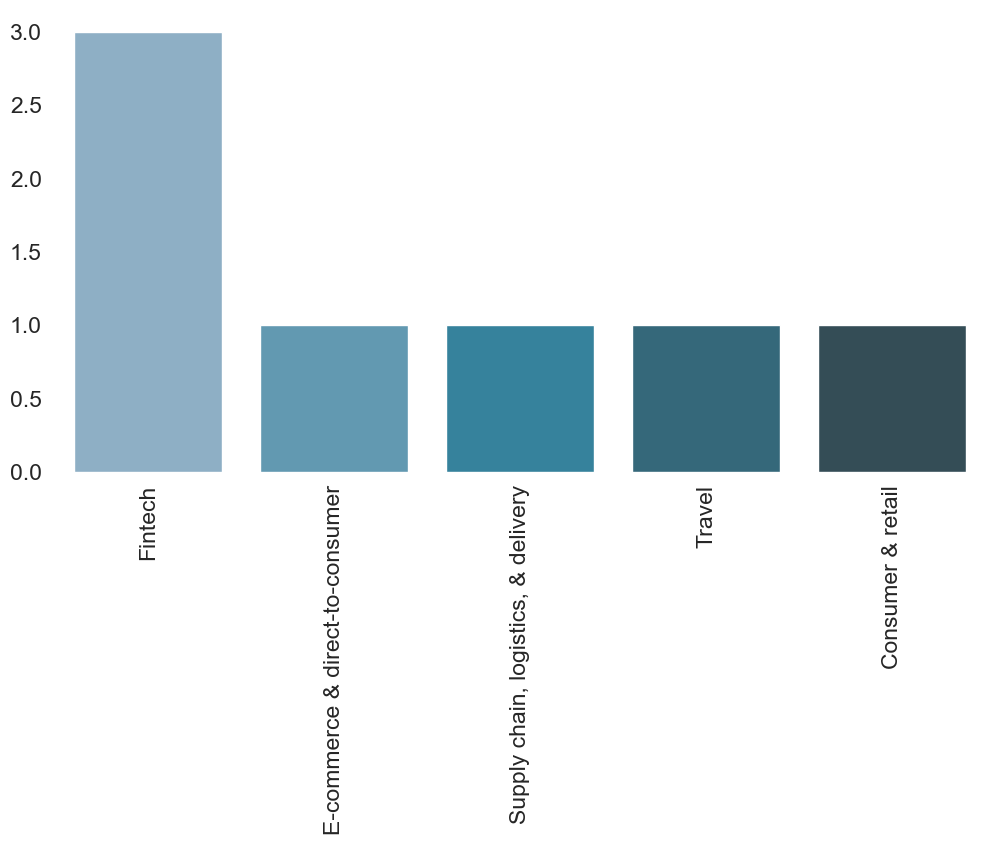

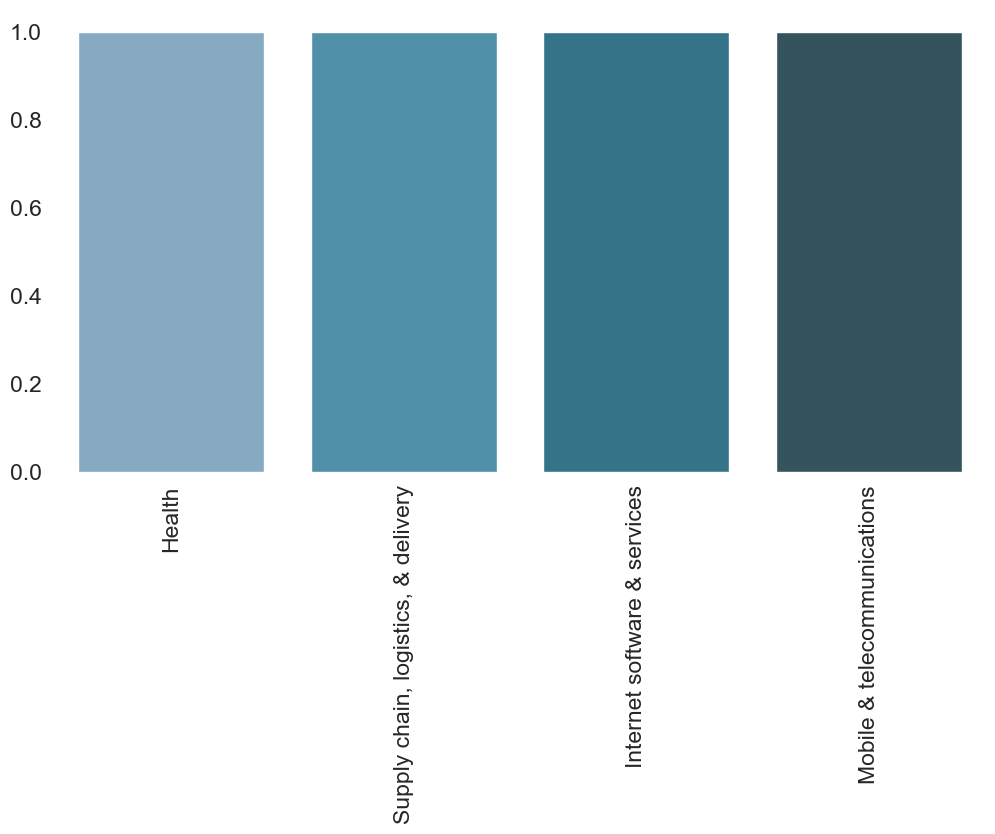

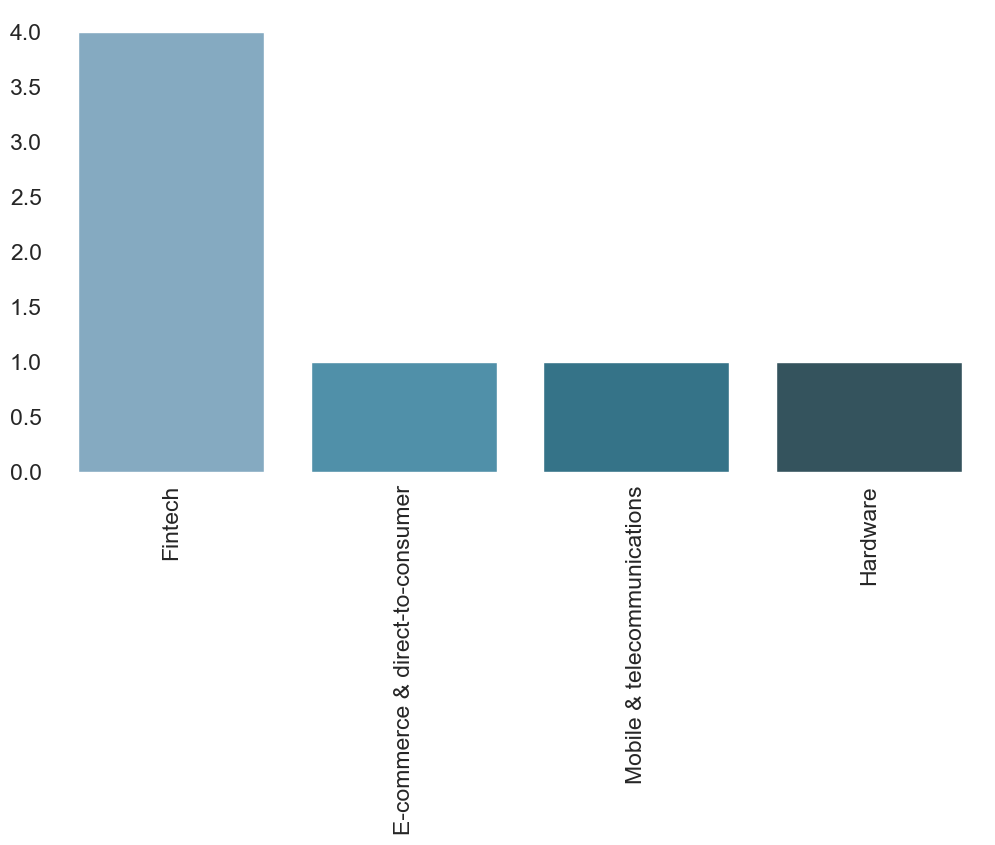

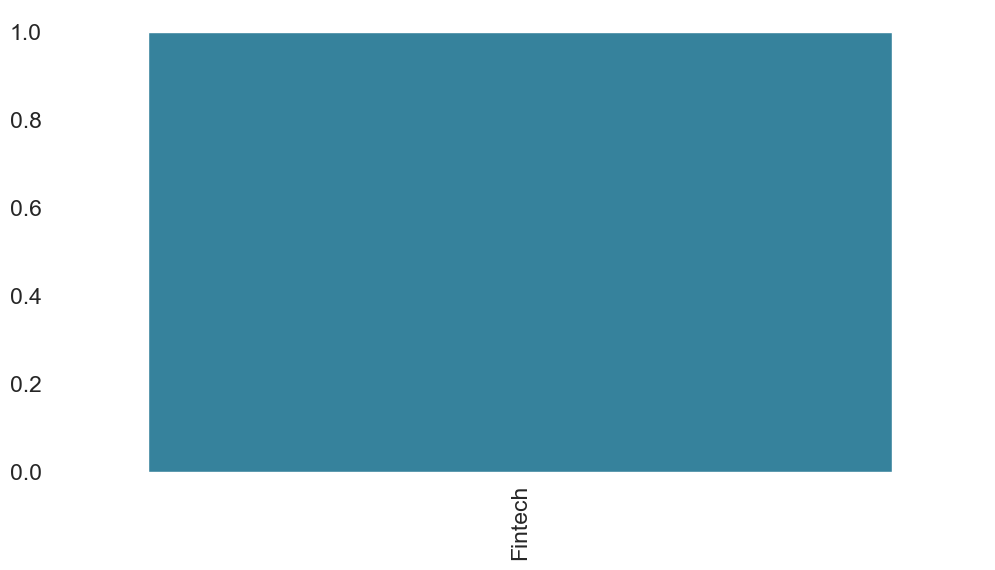

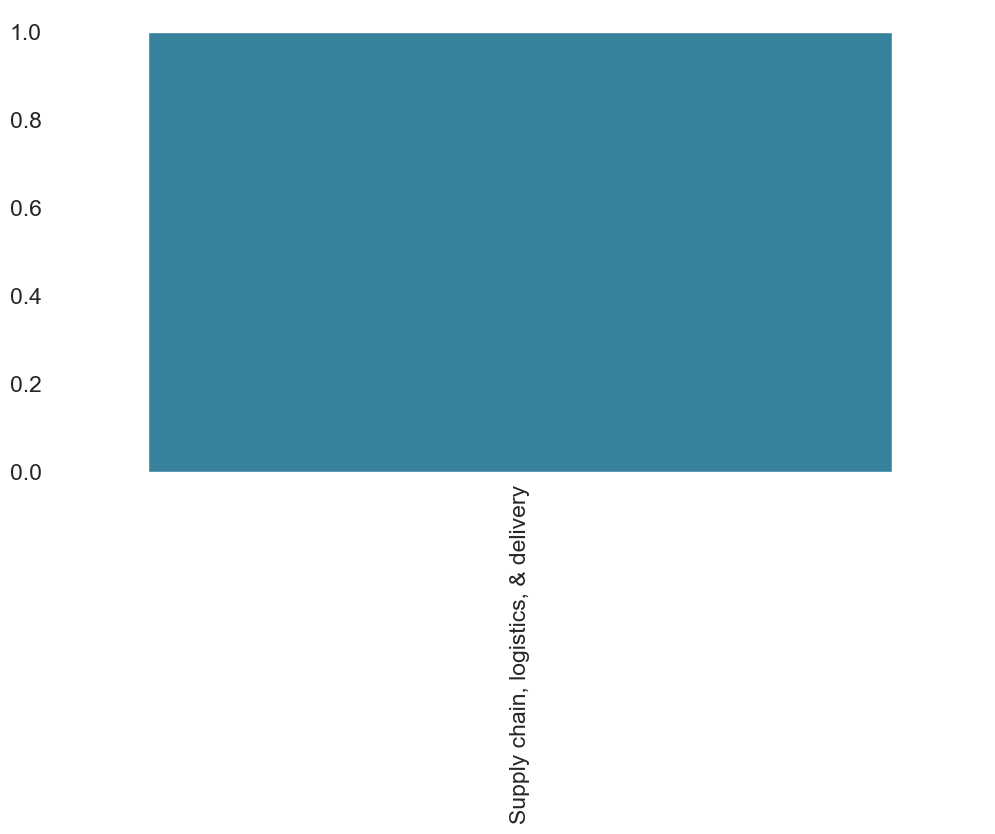

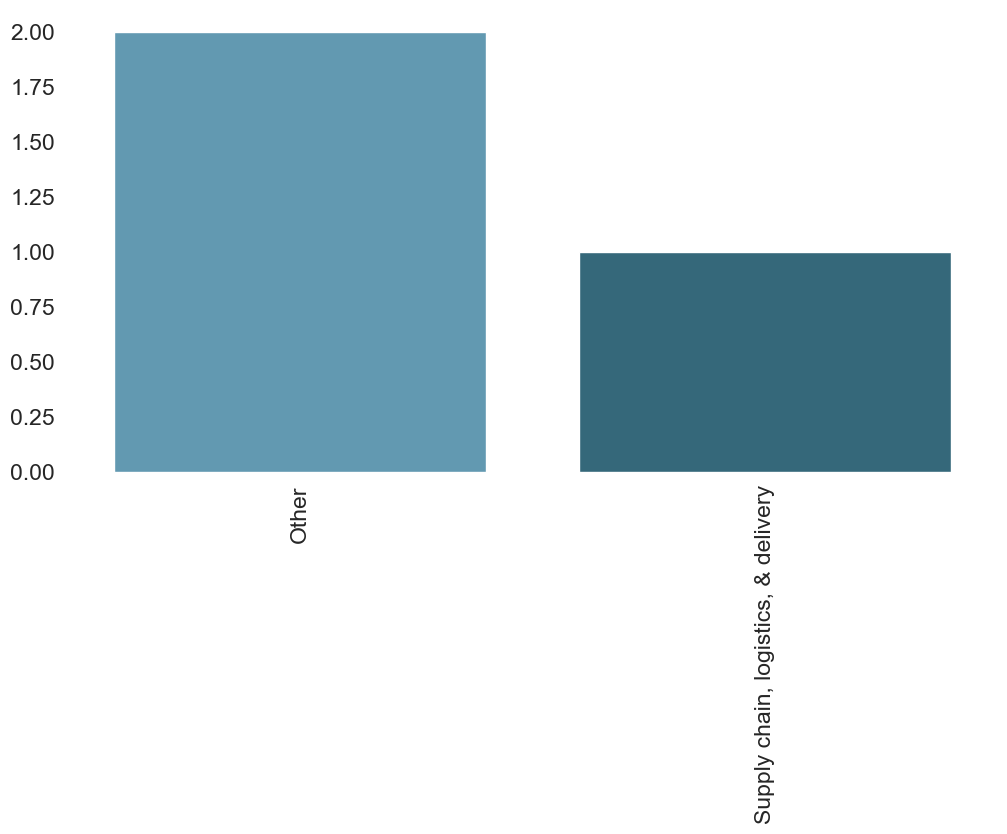

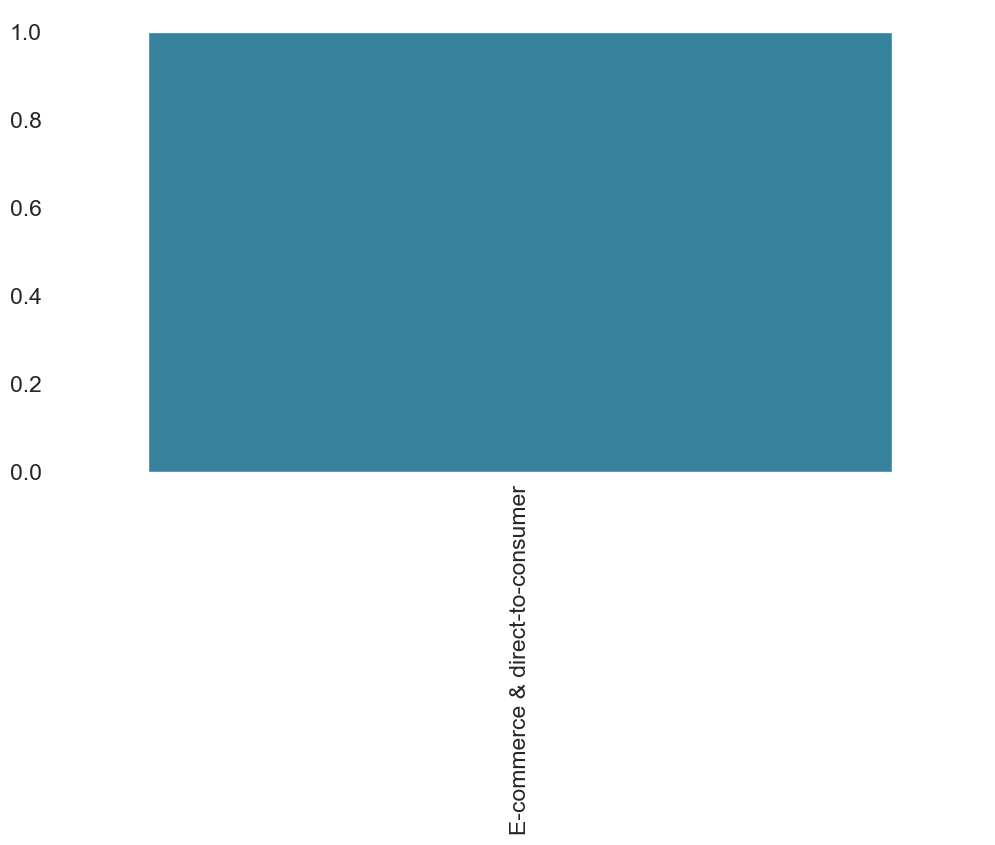

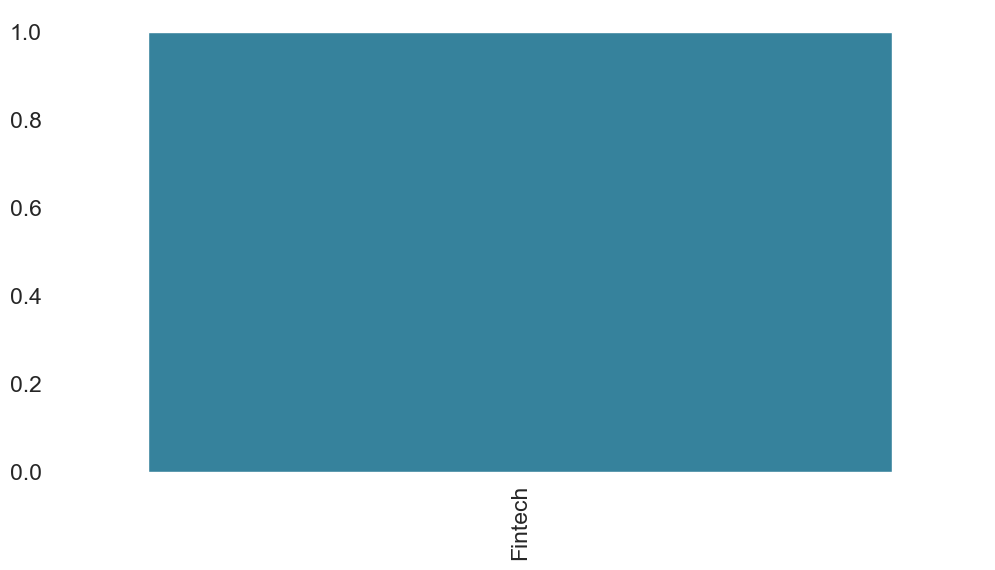

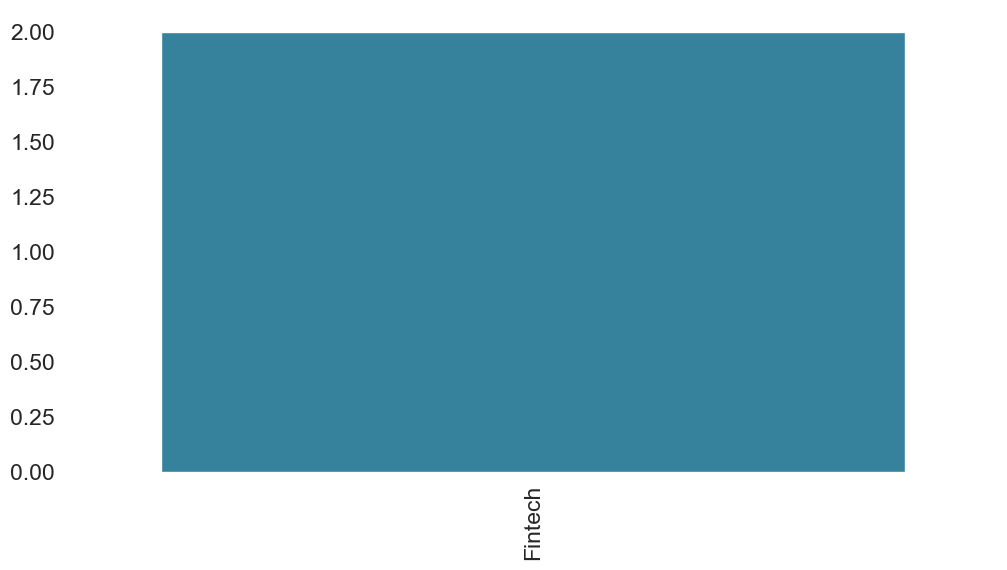

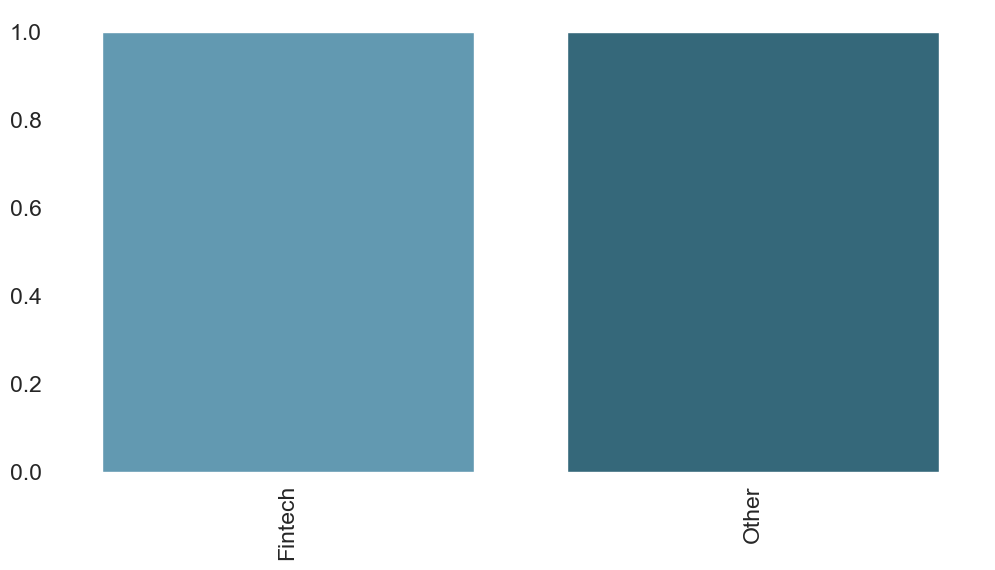

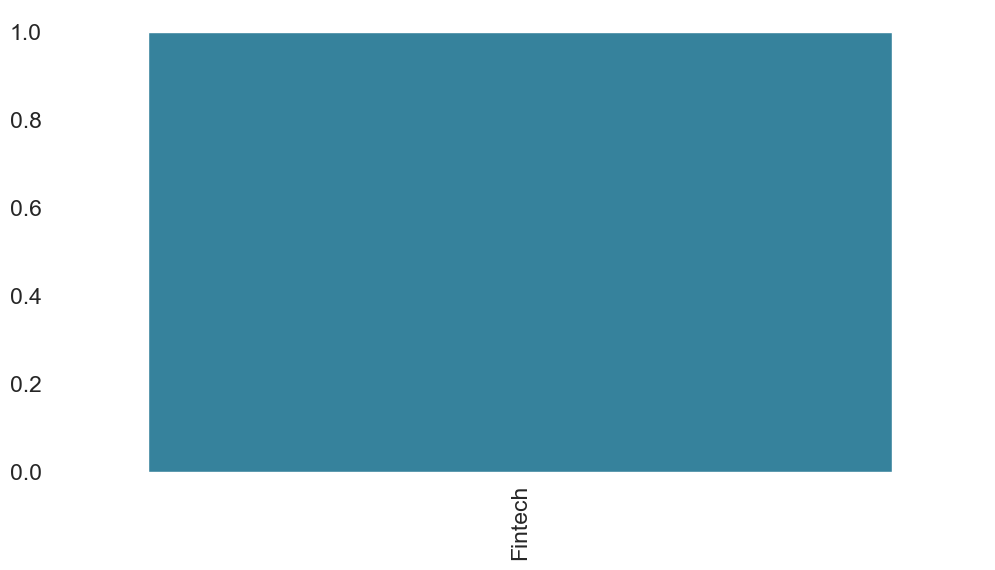

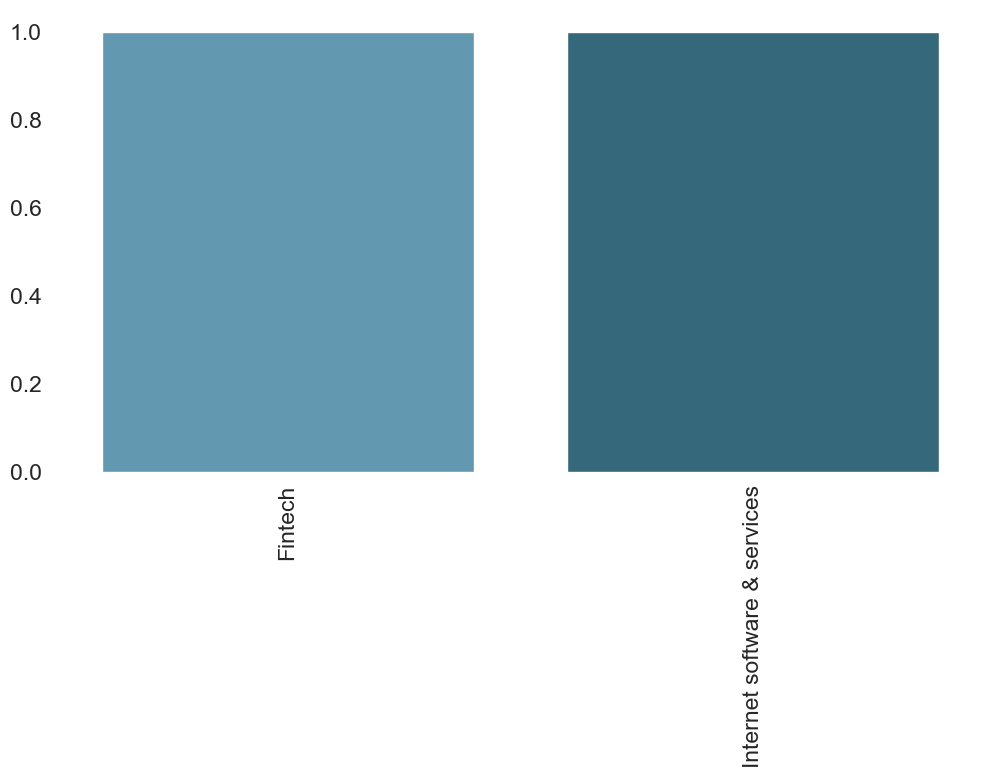

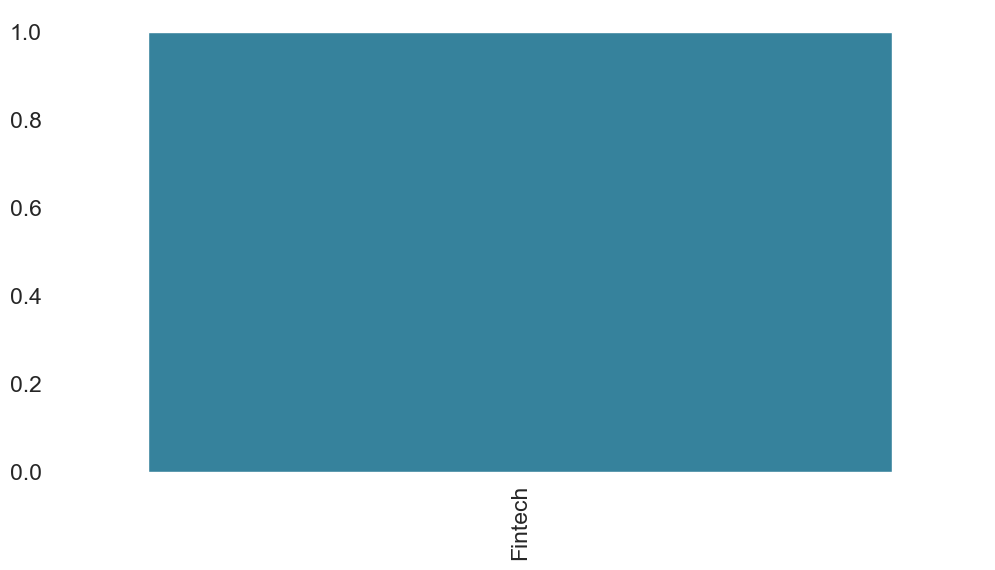

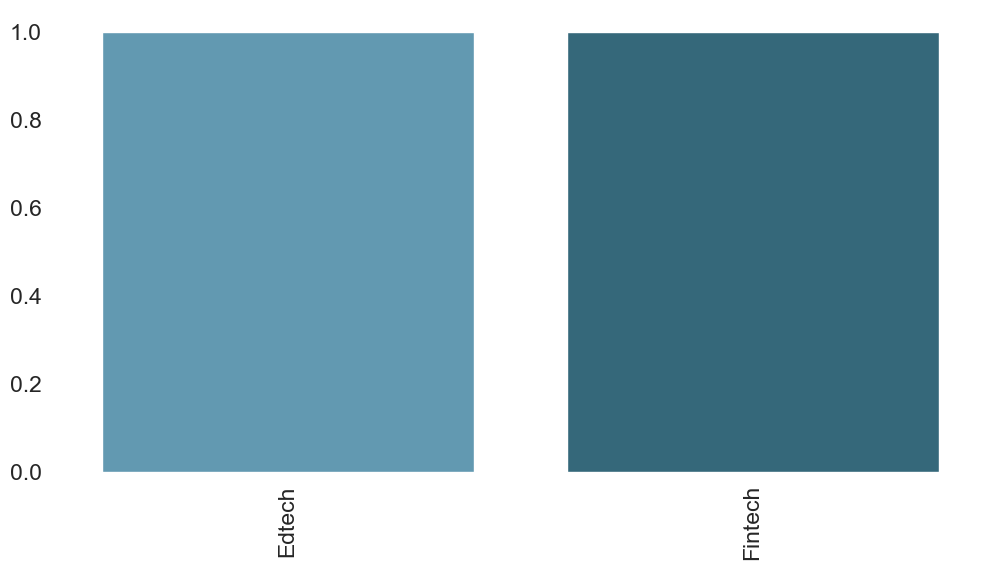

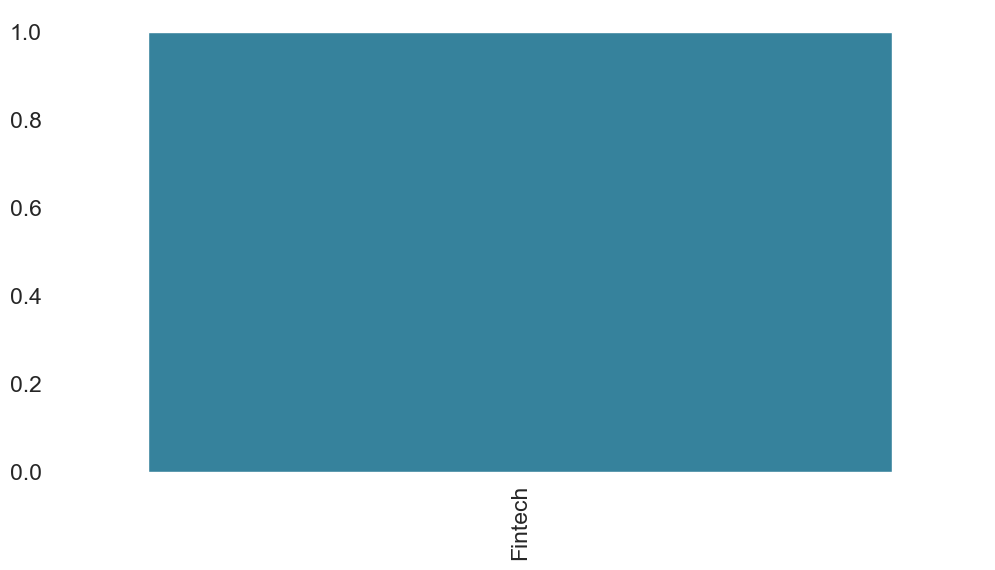

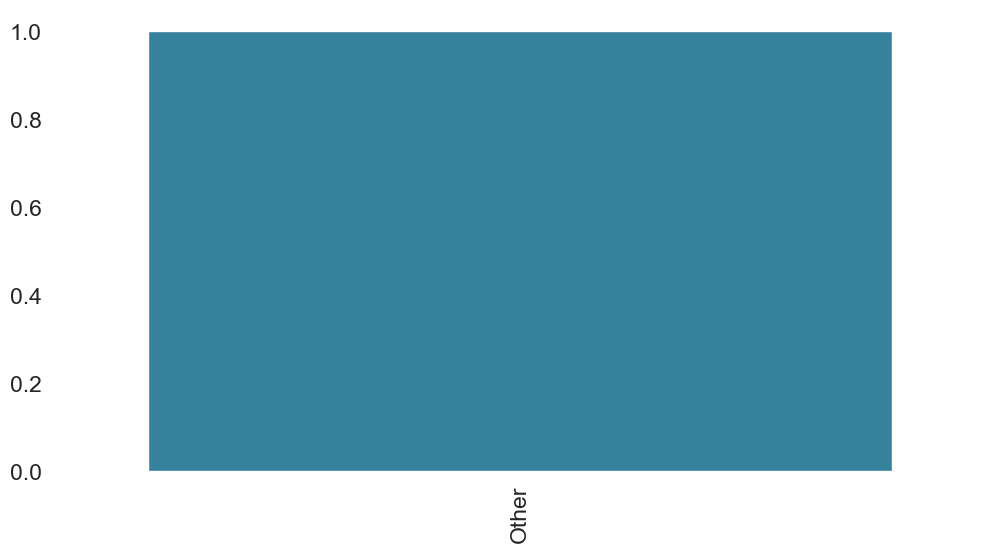

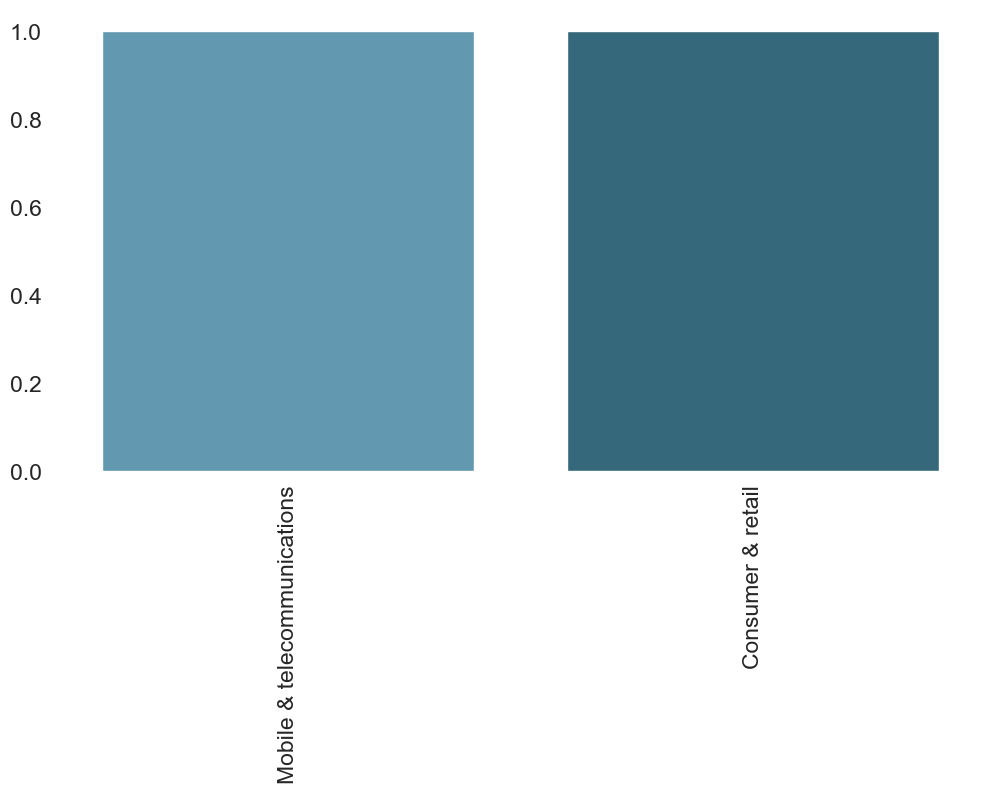

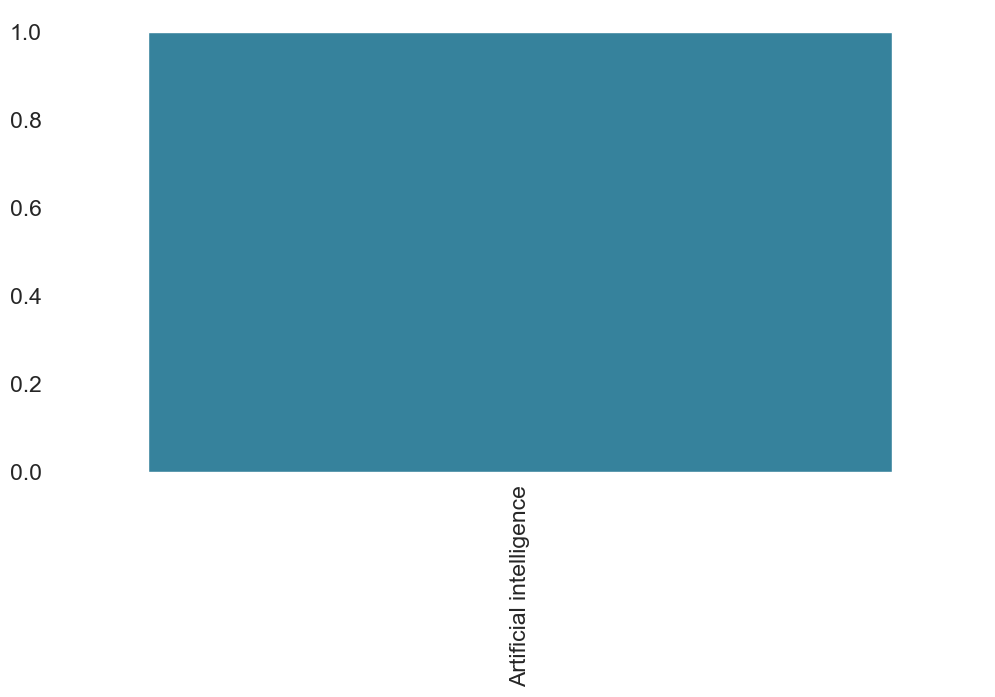

In [6]:
def industrys_and_country(country, data):
    # Filter the data to only include rows where the Country column is equal to the specified country
    data_ind = data.loc[data['Country'] == country]

    # Set the figure size and font scale
    sns.set(font_scale=1.5, rc={'figure.figsize':(12,6)})

    # Create the bar plot
    sns.barplot(x=data_ind['Industry'].value_counts().index, y=data_ind['Industry'].value_counts().values, palette='PuBuGn_d')

    # Add axis labels and a title
    plt.xlabel=('Industry')
    plt.ylabel=('Count')
    plt.title=(f'Number of Observations by Industry in {country}')

    # Rotate the x-axis labels to improve readability
    plt.xticks(rotation=90)

    # Remove the bounding box around the plot
    plt.box(False)

    # Show the plot
    plt.show()
    

for i in data.Country.unique():
    industrys_and_country(i, data)



# Plotting the number and types of startups in each country 

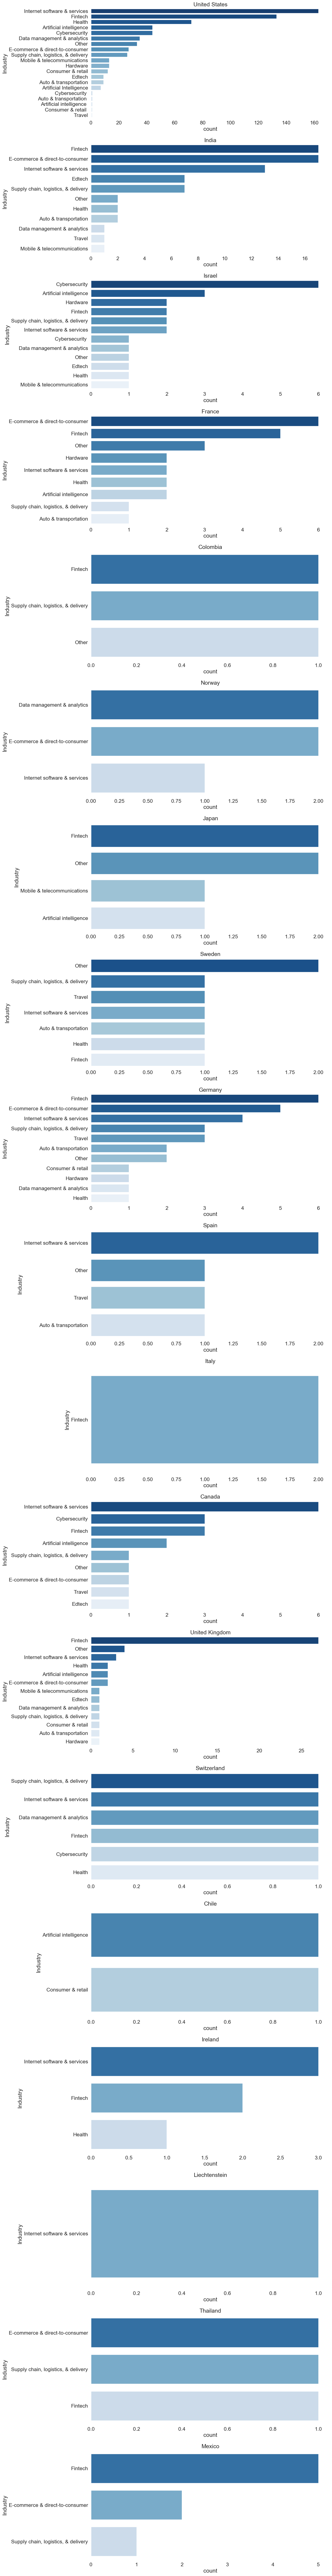

In [7]:
col=['United States', 'India', 'Israel', 'France', 'Colombia', 'Norway',        'Japan', 'Sweden', 'Germany', 'Spain', 'Italy', 'Canada',        'United Kingdom', 'Switzerland', 'Chile', 'Ireland',        'Liechtenstein', 'Thailand', 'Mexico']

fig, axs = plt.subplots(len(col), 1, figsize=(15, 6 * len(col)))

for i, ax in enumerate(axs):
    data_ind = data.loc[data.Country.isin([col[i]])]
    sns.countplot(y=data_ind["Industry"], data=data_ind, ax=ax, palette='Blues_r', order=data_ind["Industry"].value_counts().index)
#     ax.set_yticklabels(fontsize=13)
    ax.set_title(col[i])
    ax.set_frame_on(False)

plt.tight_layout()
plt.show()


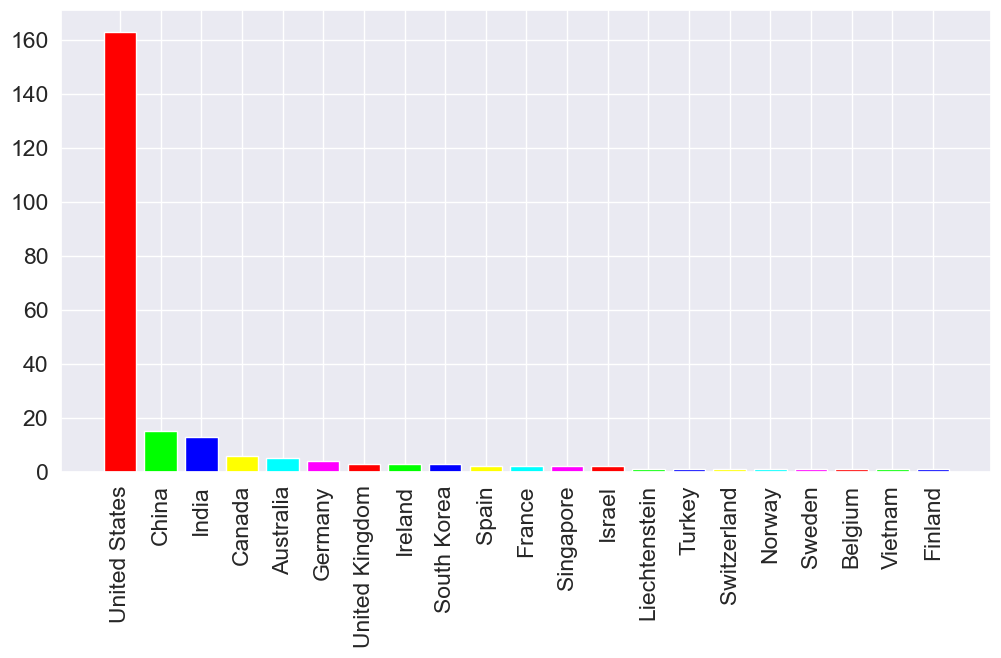

In [8]:
# Filter the data to only include rows where the Industry column is equal to 'Internet software & services'
Internet_software_services_df = data.loc[data['Industry'] == 'Internet software & services']

# Get the value counts for the 'Country' column
country_counts = Internet_software_services_df['Country'].value_counts()

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
plt.bar(x=country_counts.index, height=country_counts.values, color=['#ff0000', '#00ff00', '#0000ff', '#ffff00', '#00ffff', '#ff00ff'])

# Add axis labels and a title
plt.xlabel=('Country')
plt.ylabel=('Count')
plt.title=('Number of Observations by Country in Internet software & services Industry')

# Rotate the x-axis labels to improve readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


As can be seen, Fintech has the highest number of startups, followed by internet software companies.

# 1.2 Let's see which year has the most startups established And which are they

<AxesSubplot:>

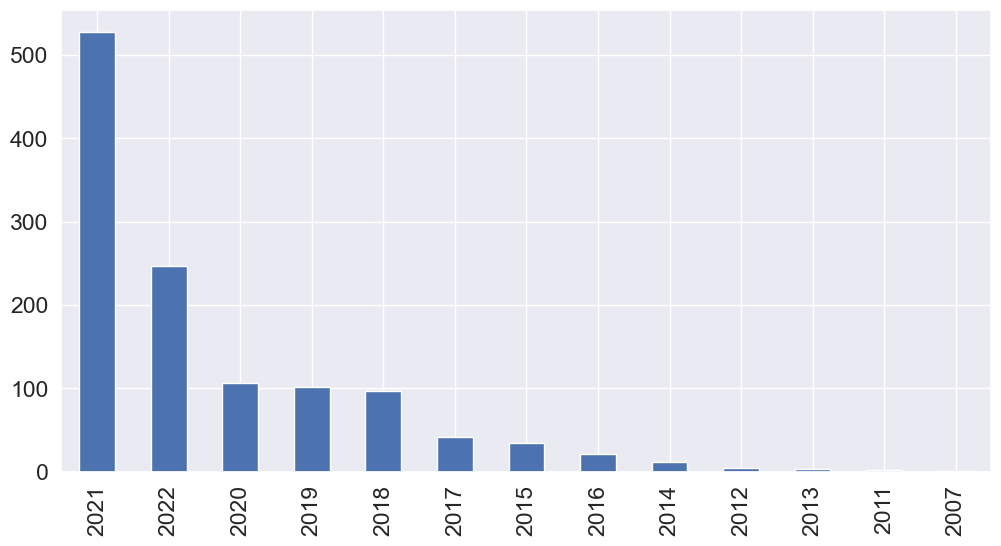

In [9]:
data['Year Joined'].value_counts().plot(kind='bar')

# discover which firms were founded in 2022.

In [10]:
Compony_22=data.loc[data['Year Joined'] == 2022]
Compony_22['Company']

0                   Esusu
1              Fever Labs
2                   Minio
3               Darwinbox
4                 Pentera
              ...        
242                 Qonto
243    The Boring Company
244                 RELEX
245                KuCoin
246                  Miro
Name: Company, Length: 247, dtype: object

# What nation will see the establishment of fintech businesses in 2022?

<AxesSubplot:>

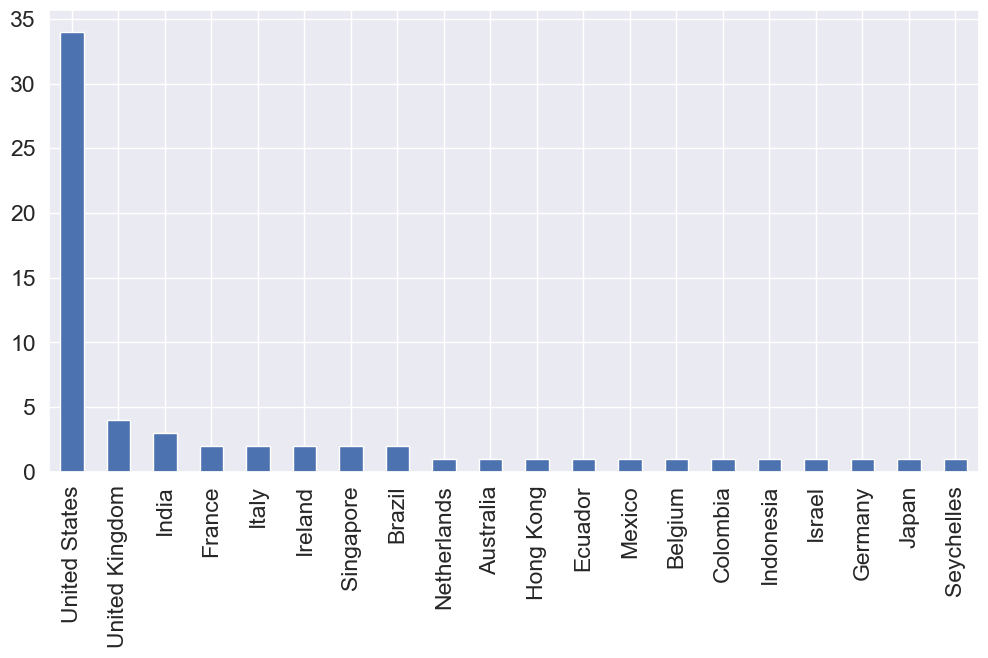

In [11]:
comp_2022_fintech=data.loc[(data.Industry =='Fintech') & (data['Year Joined']==2022)]
comp_2022_fintech['Country'].value_counts().plot(kind='bar')



As can be seen, the United States will have the most established Fintech Startups by 2022.

# What nation will see the establishment of Internet software & services businesses in 2022?

<AxesSubplot:>

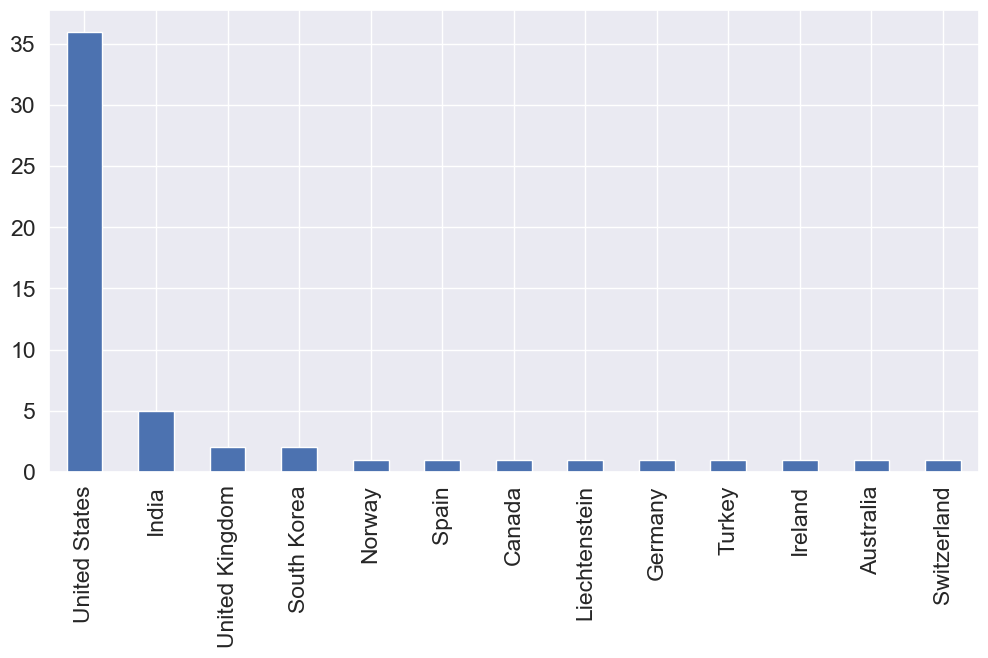

In [12]:
comp_2022_Internet=data.loc[(data.Industry =='Internet software & services') & (data['Year Joined']==2022)]
comp_2022_Internet['Country'].value_counts().plot(kind='bar')

In [13]:
data.groupby(['Industry','Country']).Valuation.agg([min,max,len])

min   max  len
Industry                Country                      
Artificial Intelligence China          1.0  1.46    4
                        United States  1.0  2.50    7
Artificial intelligence Bermuda        1.6  1.60    1
                        Brazil         2.6  2.60    1
                        Canada         1.0  1.20    2
...                                    ...   ...  ...
Travel                  Indonesia      3.0  3.00    1
                        South Korea    1.0  1.00    1
                        Spain          1.3  1.30    1
                        Sweden         1.0  1.00    1
                        United States  9.2  9.20    1

[216 rows x 3 columns]

# Is there a particular geographical region that is driving the growth of Fintech startups or internet software companies? 

# Let's now determine which industries India has.

Fintech                                17
E-commerce & direct-to-consumer        17
Internet software & services           13
Edtech                                  7
Supply chain, logistics, & delivery     7
Other                                   2
Health                                  2
Auto & transportation                   2
Data management & analytics             1
Travel                                  1
Mobile & telecommunications             1
Name: Industry, dtype: int64

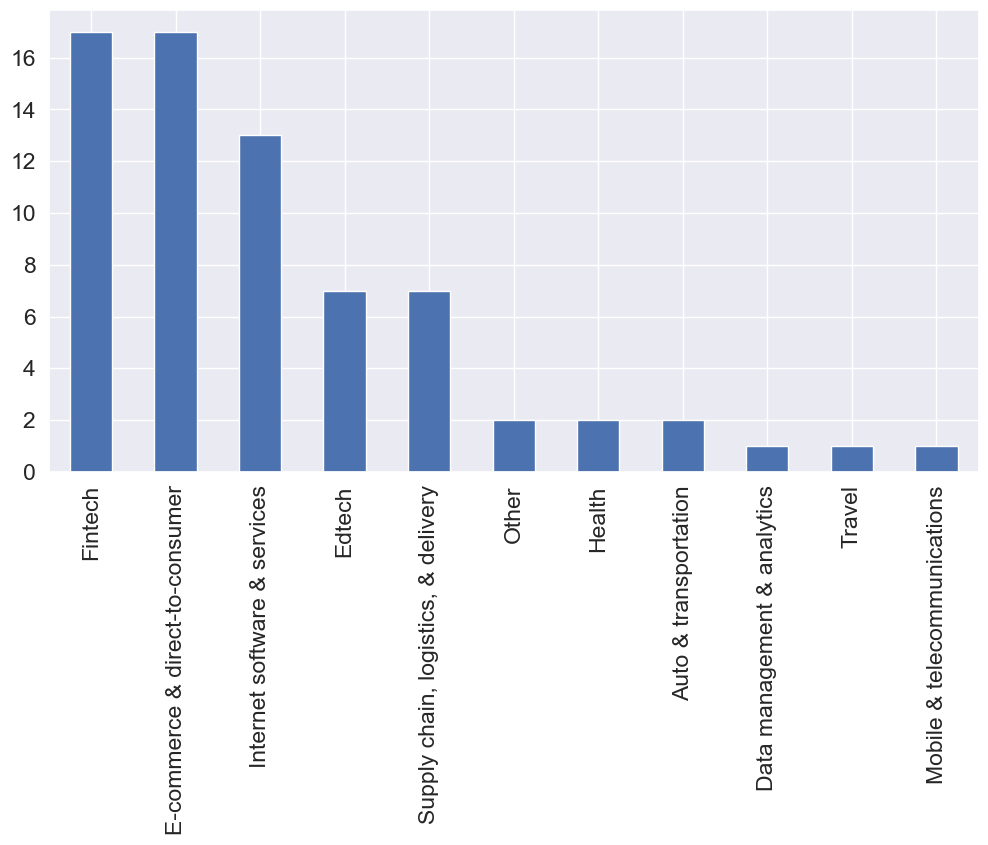

In [14]:
data_ind=data.loc[data.Country.isin(['India'])]
data_ind.Industry.value_counts().plot(kind='bar')
data_ind['Industry'].value_counts()

# Which startups in India are more valuable, and what are they?

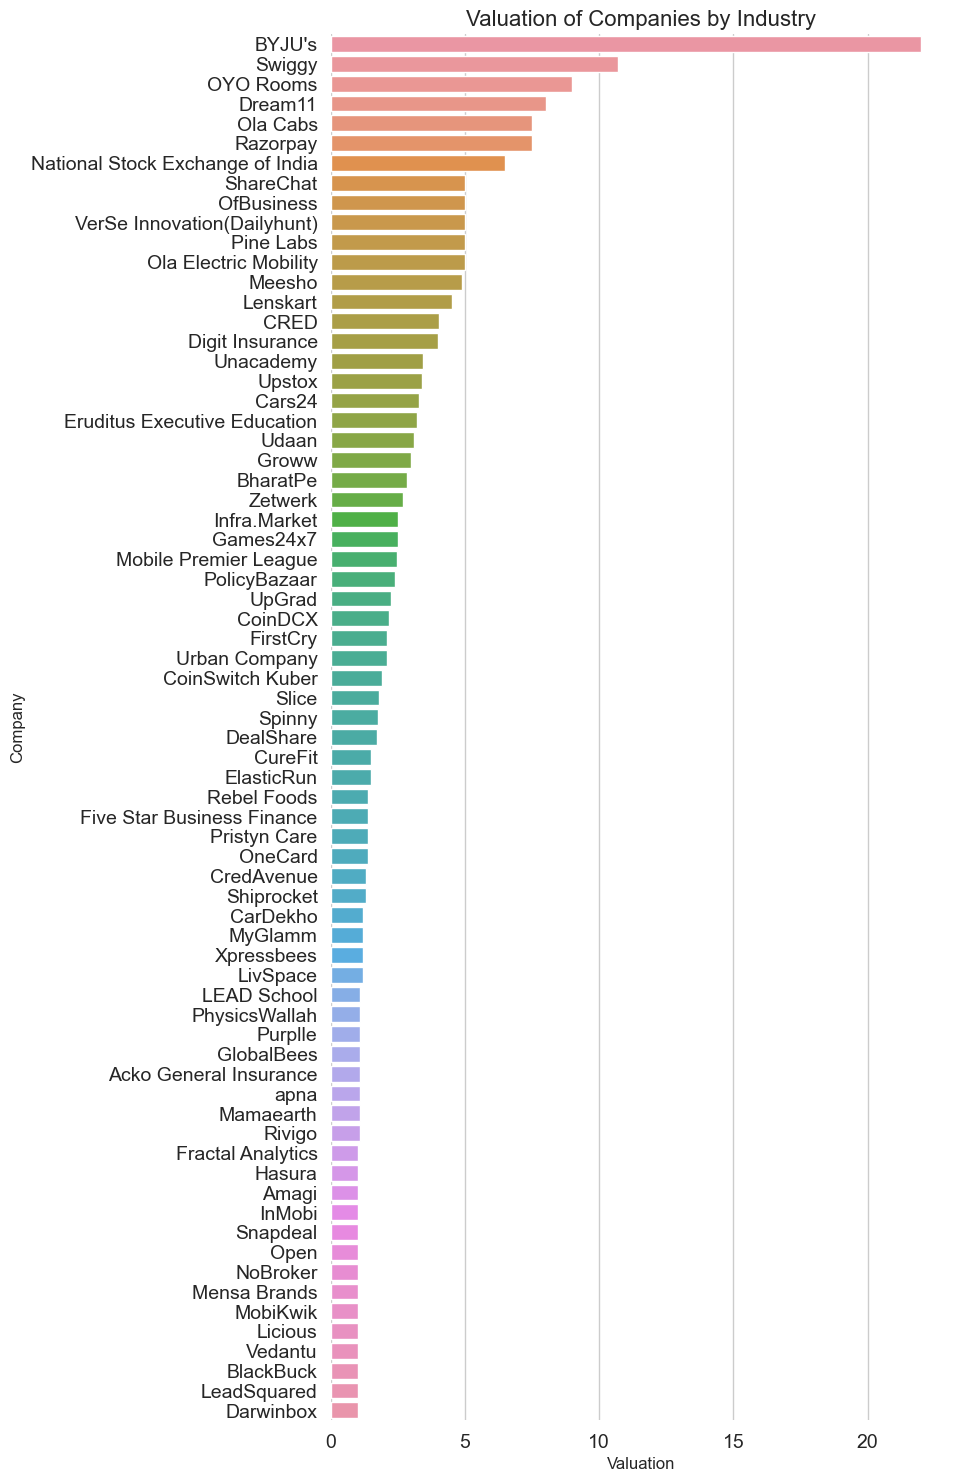

In [16]:
# ind_sorted_df=data_ind.sort_values("Valuation", ascending=False)
# sns.set_theme(style="whitegrid")
# f, ax = plt.subplots(figsize=(6, 15))
# sns.set_color_codes("pastel")
# sns.barplot(x="Valuation", y="Company", data=ind_sorted_df,
#             label="Valuation", color="g")
# sns.despine(left=True, bottom=True)



# Sort the data by Valuation in descending order
ind_sorted_df = data_ind.sort_values("Valuation", ascending=False)

# Use a more appropriate color palette for the plot
sns.set_palette("magma")

# Increase the size of the plot
f, ax = plt.subplots(figsize=(8, 18))

# Plot the Valuation for each company as a bar plot
sns.barplot(x="Valuation", y="Company", data=ind_sorted_df,
            label="Valuation")

# Use a more appropriate font size for the x-axis and y-axis labels and tick marks
ax.tick_params(axis='both', which='major', labelsize=14)

# Use a more appropriate font size for the title
ax.set_title("Valuation of Companies by Industry", fontsize=16)

# Remove the spines from the plot
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()


# Let's take a look at where each fintech startup is located in India. 

<AxesSubplot:>

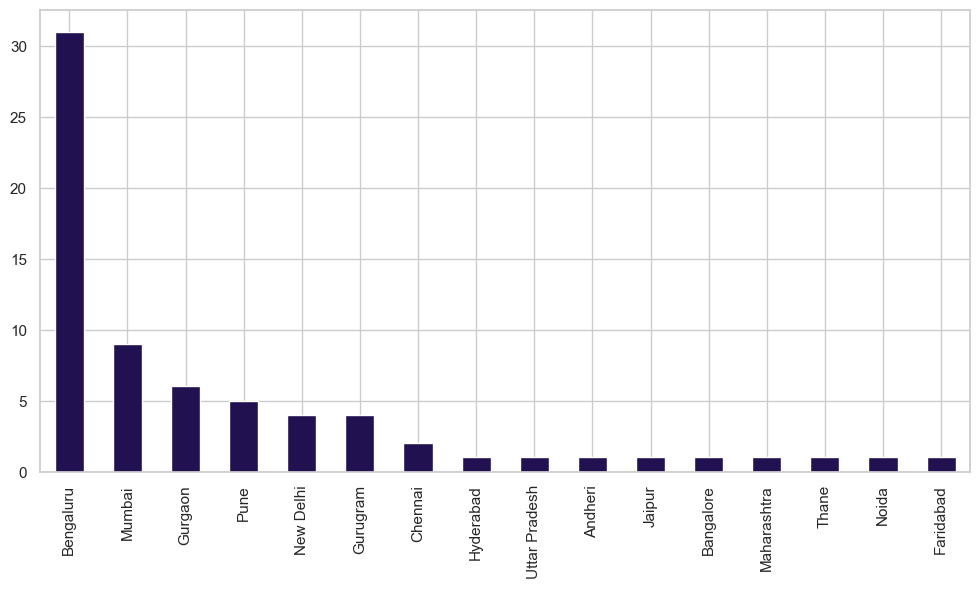

In [17]:
fin_df=data.loc[data['Industry'] == 'Fintech']
ind_fin_df=data.loc[data.Country.isin(['India'])]
ind_fin_df['City'].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Startups located in india and theyre counts'}>

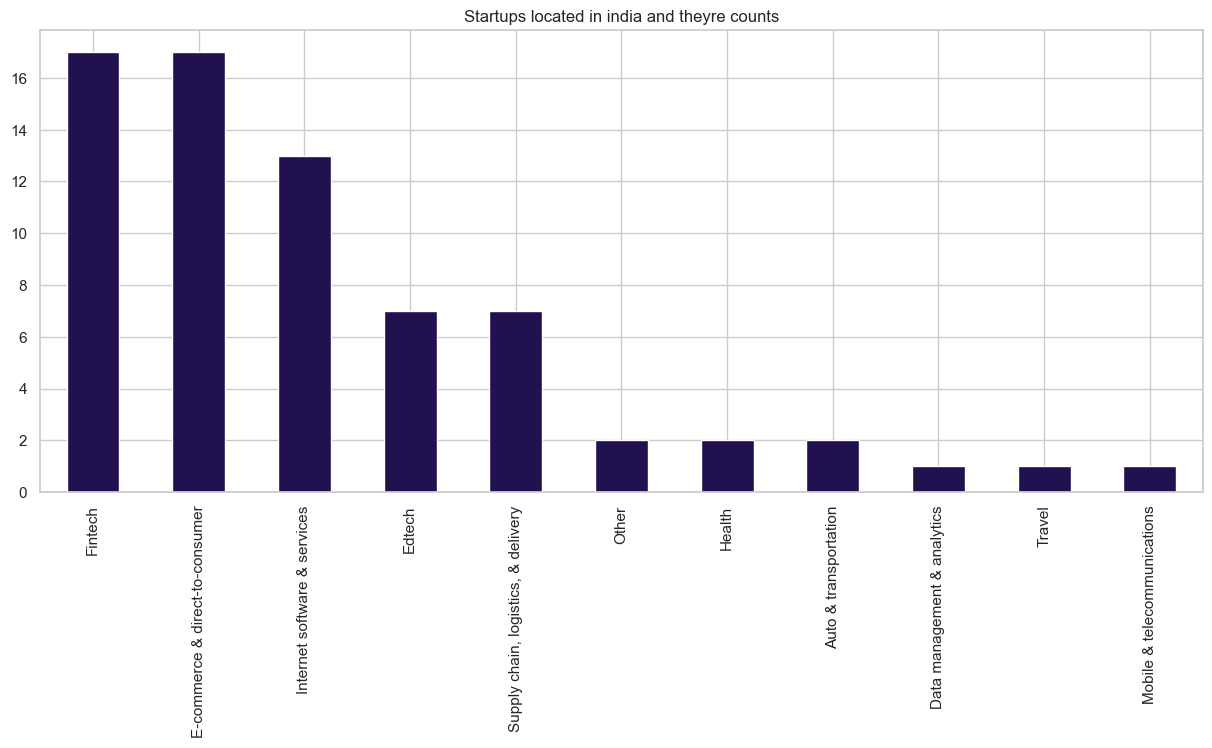

In [18]:

f, ax = plt.subplots(figsize=(15, 6))
data_ind=data.loc[data.Country.isin(['India'])]
data_ind['Industry'].value_counts().plot(kind='bar',title='Startups located in india and theyre counts')


<AxesSubplot:>

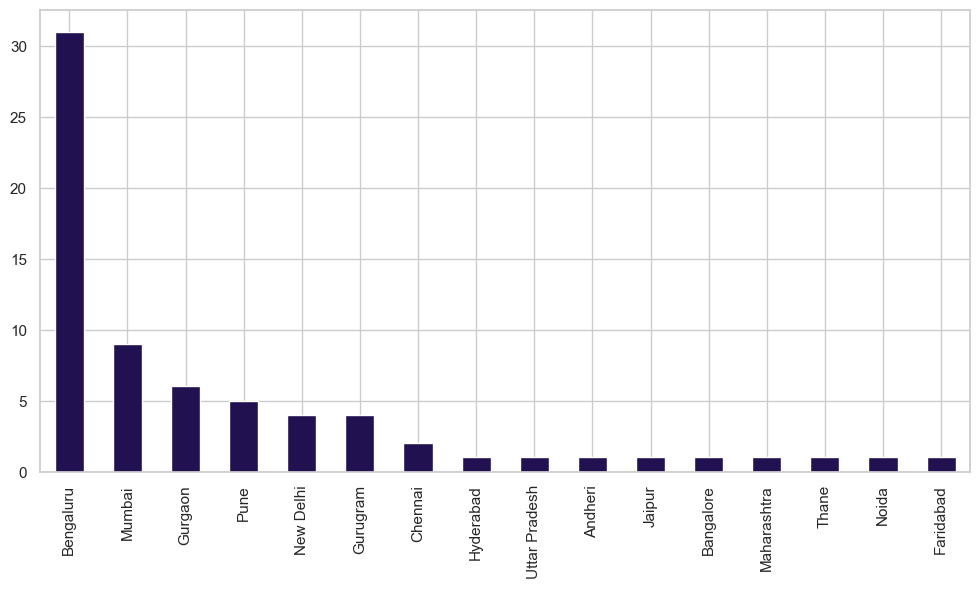

In [19]:
fin_df=data.loc[data['Industry'] == 'Fintech']
ind_fin_df=data.loc[data.Country.isin(['India'])]
ind_fin_df['City'].value_counts().plot(kind='bar')

<AxesSubplot:>

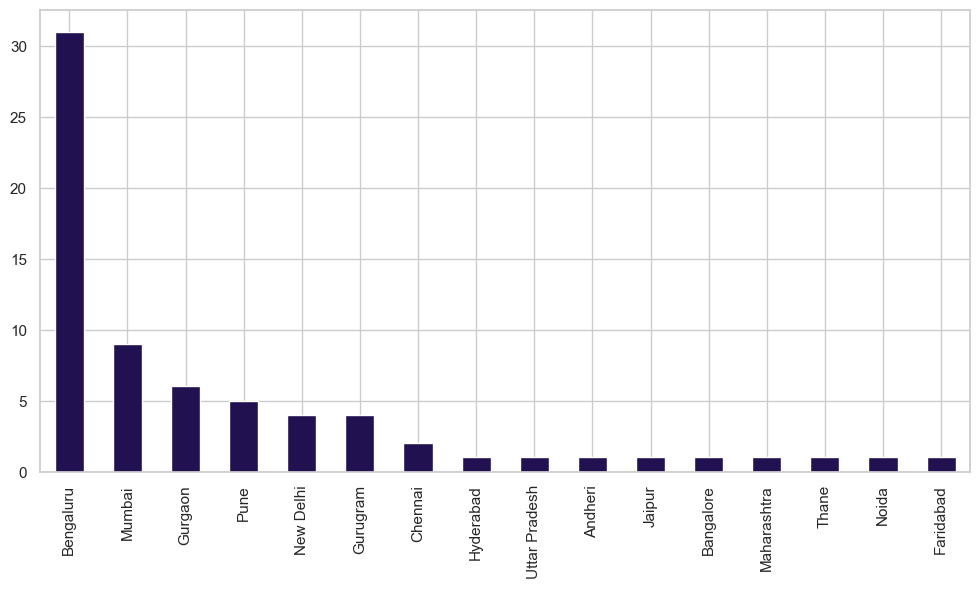

In [20]:
fin_df=data.loc[data['Industry'] == 'Internet software & services']
ind_fin_df=data.loc[data.Country.isin(['India'])]
ind_fin_df['City'].value_counts().plot(kind='bar')

In [21]:
df_india=data.loc[(data['Country'] == "India") ]
df_india["Industry"].value_counts()


Fintech                                17
E-commerce & direct-to-consumer        17
Internet software & services           13
Edtech                                  7
Supply chain, logistics, & delivery     7
Other                                   2
Health                                  2
Auto & transportation                   2
Data management & analytics             1
Travel                                  1
Mobile & telecommunications             1
Name: Industry, dtype: int64

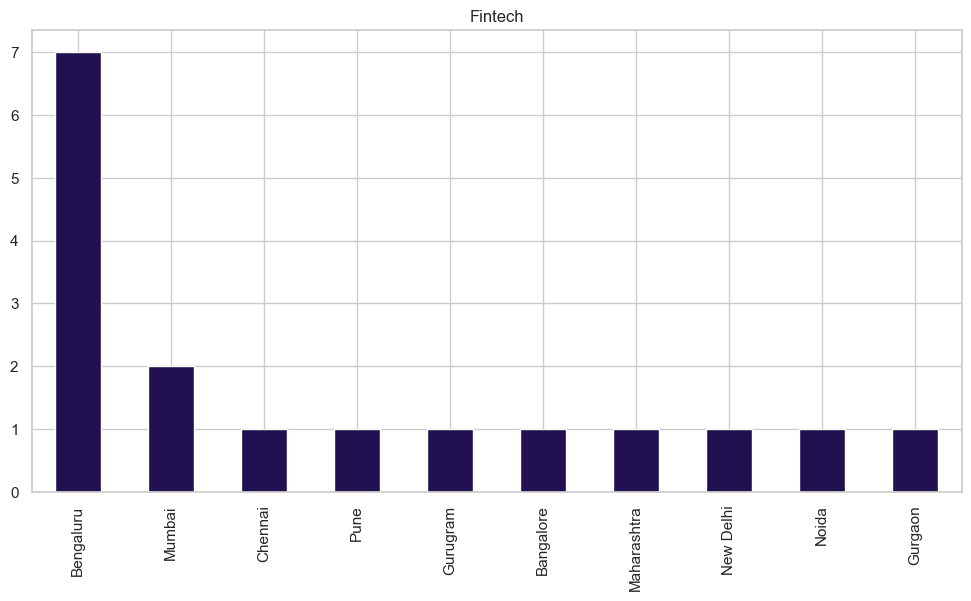

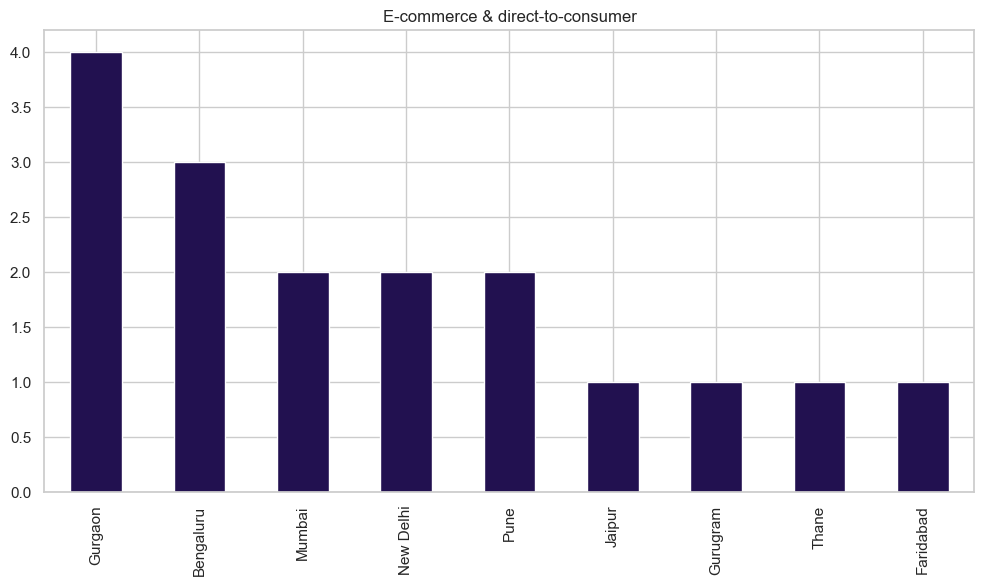

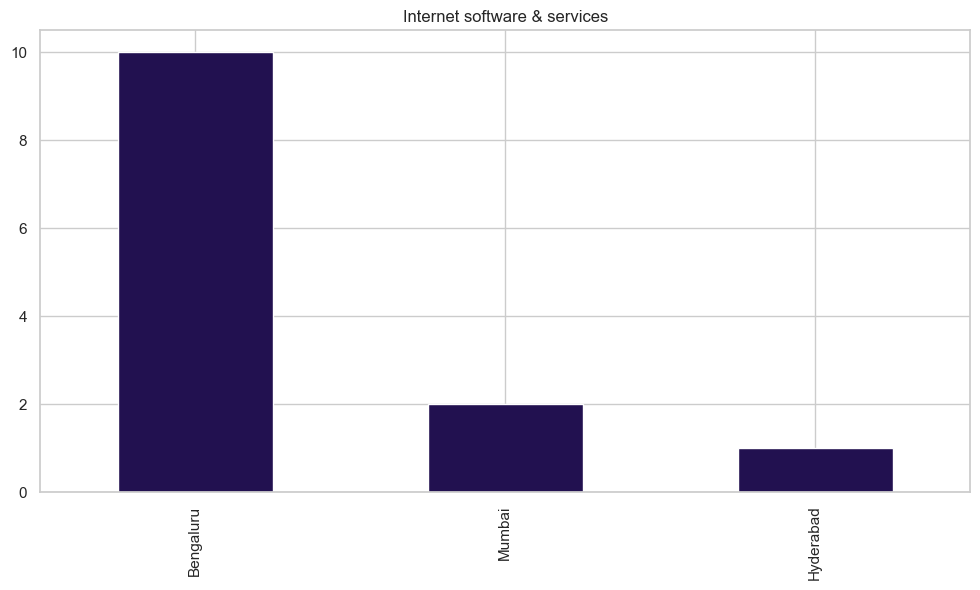

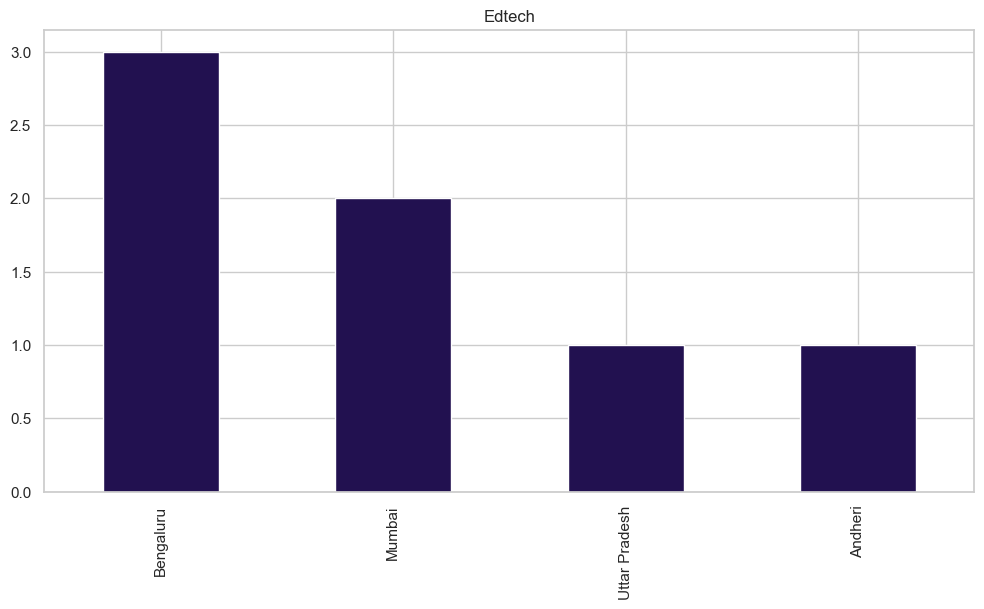

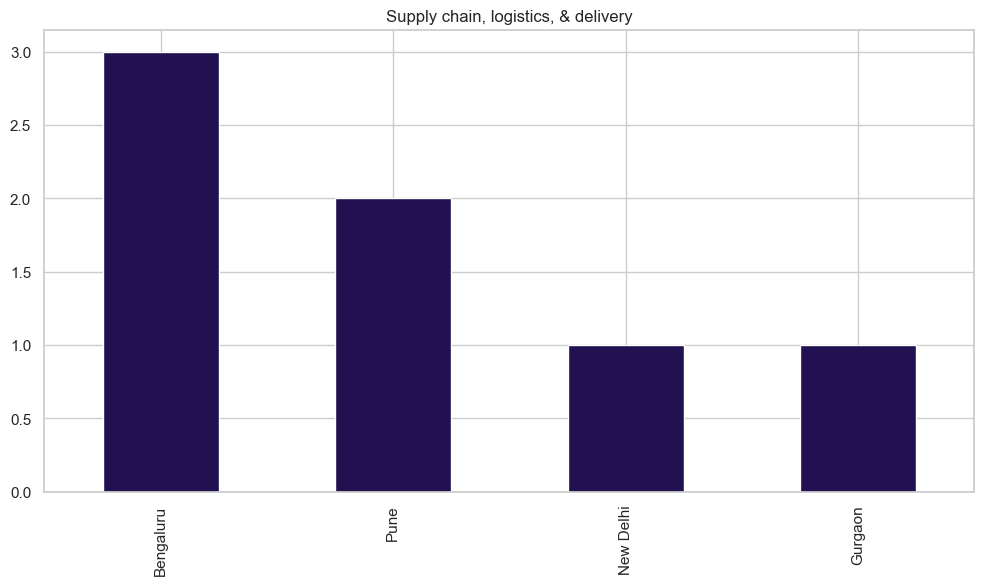

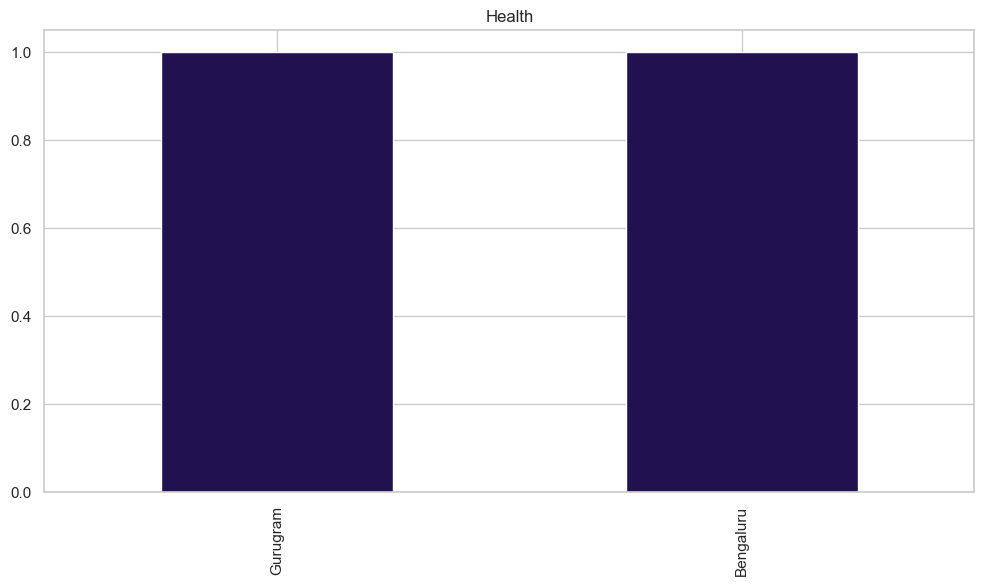

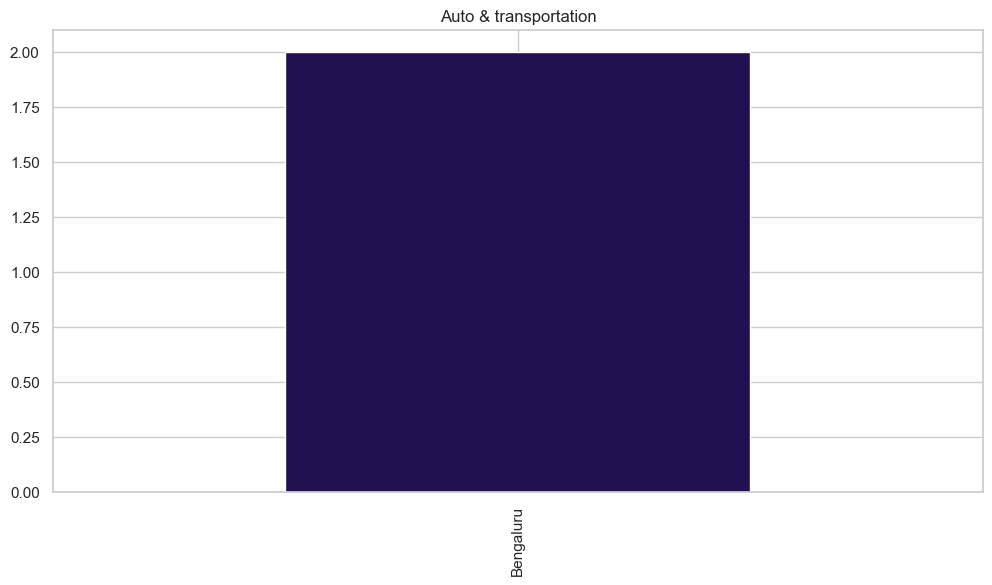

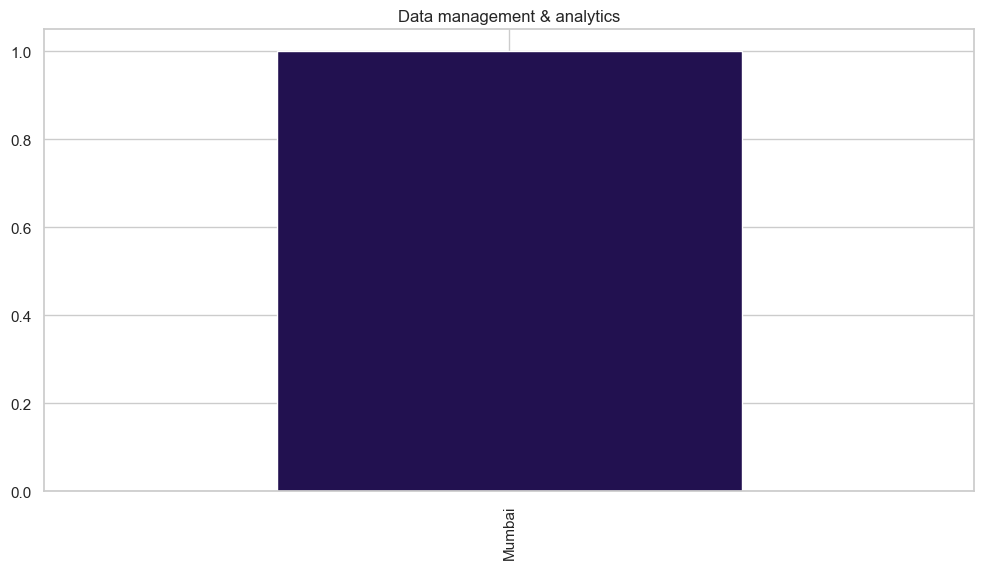

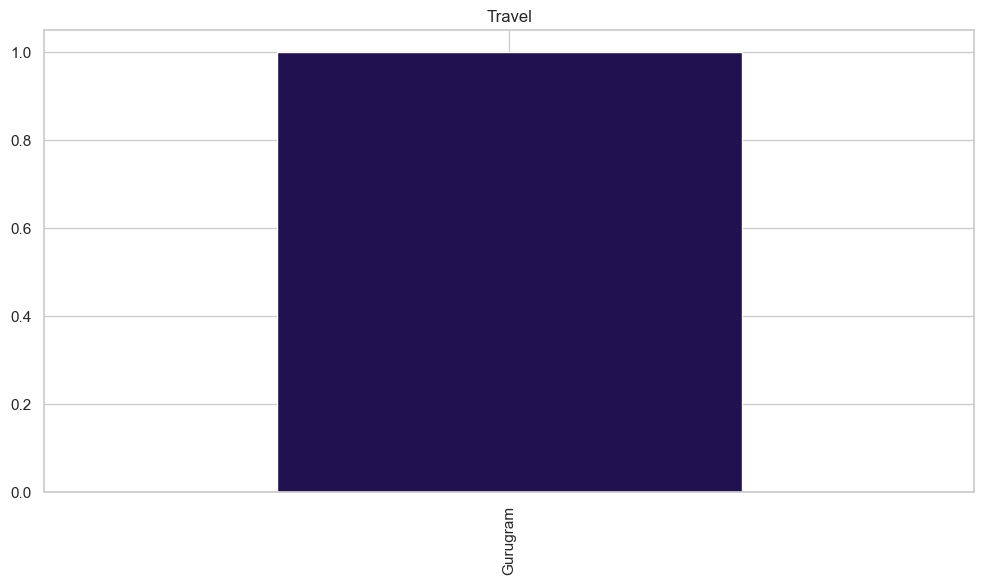

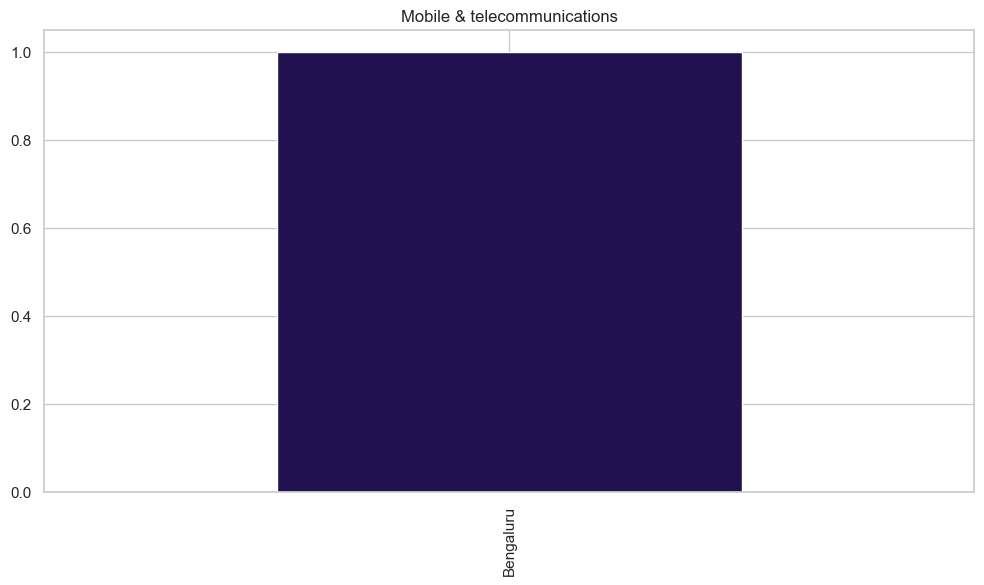

In [22]:
ind=['Fintech','E-commerce & direct-to-consumer','Internet software & services',
    'Edtech','Supply chain, logistics, & delivery','Health','Auto & transportation',
    'Data management & analytics','Travel','Mobile & telecommunications']
for i in  ind:
    ind_fin_df=data.loc[data.Country.isin(['India'])]
    fin_df=ind_fin_df.loc[data['Industry'] == i]
    
    fin_df['City'].value_counts().plot(kind='bar',title=i)
    plt.show()

# "I will continue this notebook at a later time."